# Продажа квартир в Санкт-Петербурге — анализ рынка недвижимости

<h2>Ход исследования</h2>

1. [Изучение общей информации по представленным данным](#start)
2. [Предобработка данных (удаление/обработка дубликатов, заполнение пропусков)](#preprocessing)
3. [Анализ потребности в дополнительной информации, определенной на основании исходнных данных, если да - определить и отобразить их](#dop_info)
4. [Исследование данных, анализ влияния разных параметров на рыночную стоимость объектов недвижимости](#analysis)
5. [Общий вывод, рекомендации.](#conclusion)

### Изучение общей информации
<a id="start"></a> 

In [1]:
#импорт библиотек, необходимых для проведения анализа
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#вызываем функцию игнорирования предупреждений
import warnings
warnings.filterwarnings('ignore')

In [2]:
#устанавливаем, чтобы всн числа по умолчанию были с 2-мя знаками после запятой
pd.options.display.float_format = '{:.2f}'.format


#открываем файл с данными
try:
    df = pd.read_csv('C:/Users/vladi/Study/Sprint_3/real_estate_data.csv', sep='\t')
except:
    df = pd.read_csv('https://...', sep='\t')
    
#выведем первые 20 строк нашего датасета
df.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.00,108.00,2019-03-07T00:00:00,3,2.70,16.00,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.00,16028.00,1.00,482.00,2.00,755.00,NaN
1,7,3350000.00,40.40,2018-12-04T00:00:00,1,NaN,11.00,18.60,1,NaN,...,11.00,2.00,посёлок Шушары,12817.00,18603.00,0.00,NaN,0.00,NaN,81.00
2,10,5196000.00,56.00,2015-08-20T00:00:00,2,NaN,5.00,34.30,4,NaN,...,8.30,0.00,Санкт-Петербург,21741.00,13933.00,1.00,90.00,2.00,574.00,558.00
3,0,64900000.00,159.00,2015-07-24T00:00:00,3,NaN,14.00,NaN,9,NaN,...,NaN,0.00,Санкт-Петербург,28098.00,6800.00,2.00,84.00,3.00,234.00,424.00
4,2,10000000.00,100.00,2018-06-19T00:00:00,2,3.03,14.00,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.00,8098.00,2.00,112.00,1.00,48.00,121.00
5,10,2890000.00,30.40,2018-09-10T00:00:00,1,NaN,12.00,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.00
6,6,3700000.00,37.30,2017-11-02T00:00:00,1,NaN,26.00,10.60,6,NaN,...,14.40,1.00,посёлок Парголово,52996.00,19143.00,0.00,NaN,0.00,NaN,155.00
7,5,7915000.00,71.60,2019-04-18T00:00:00,2,NaN,24.00,NaN,22,NaN,...,18.90,2.00,Санкт-Петербург,23982.00,11634.00,0.00,NaN,0.00,NaN,NaN
8,20,2900000.00,33.16,2018-05-23T00:00:00,1,NaN,27.00,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.00
9,18,5400000.00,61.00,2017-02-26T00:00:00,3,2.50,9.00,43.60,7,NaN,...,6.50,2.00,Санкт-Петербург,50898.00,15008.00,0.00,NaN,0.00,NaN,289.00


In [3]:
#изучим общую информацию о файле
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Видим, что у ряда столбцов довольно много пропусков (позже по ходу исследования выведем в каких), а в некоторых указан неверный тип данных (дата публикации: object вместо datetime, апартаменты: object вместо bool).

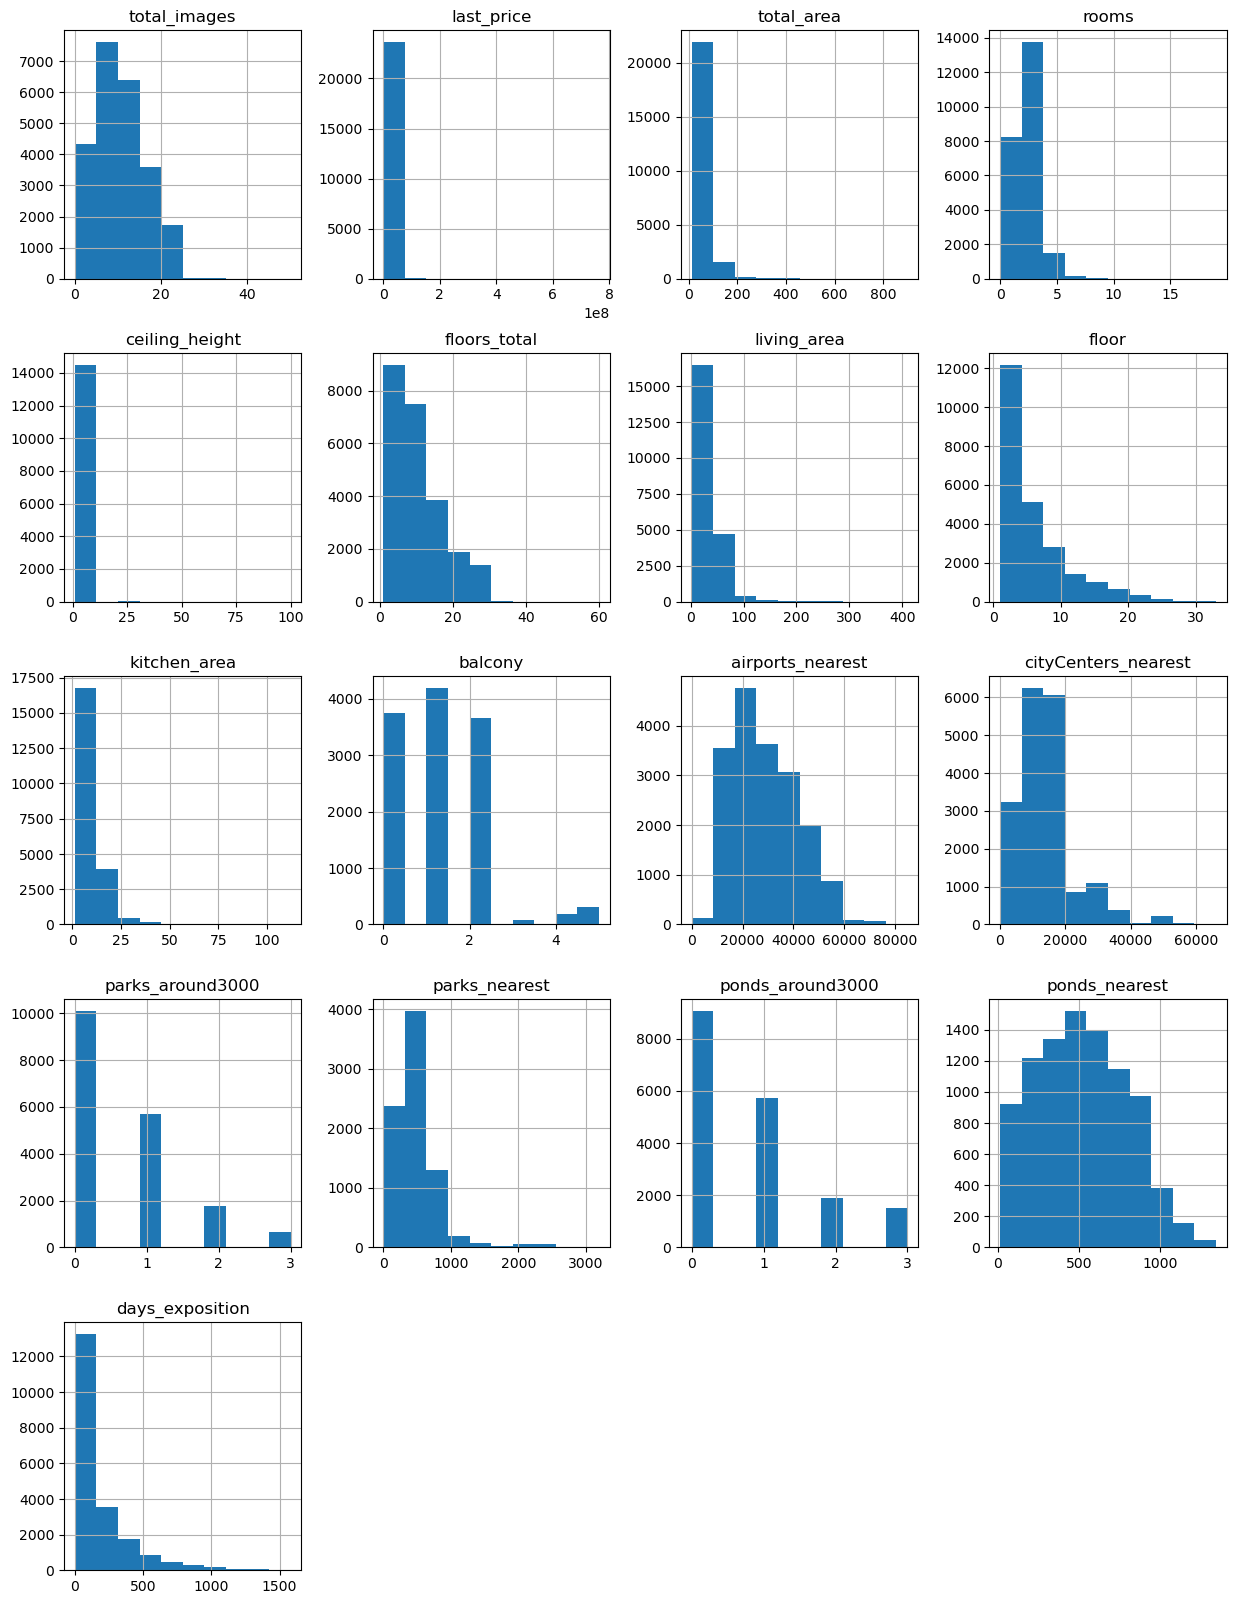

In [4]:
#построим общую гистограмму для всех числовых столбцов таблицы
df.hist(figsize=(15, 20));

### Предобработка данных
<a id="preprocessing"></a> 

2.1. Выведем количество пропущенных значений для каждого столбца:

In [5]:
pd.DataFrame(round(df.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
total_images,0.000000
last_price,0.000000
total_area,0.000000
first_day_exposition,0.000000
rooms,0.000000
ceiling_height,39.000000
floors_total,0.000000
living_area,8.000000
floor,0.000000
is_apartment,88.000000


2.2. Заполним пропущенные значения там, где это возможно, а также поменяем типа данных на верные:

1) Начнем с кол-ва балконов: скорее всего, там, где пропущены значения - балконов просто нет. Заполним пропущенные значения нулями:

In [6]:
#заменим пропущенные значения в столбце balcony на 0
df['balcony'] = df['balcony'].fillna(0)

#и сразу же проверим удалась ли замена: выведем кол-во пропущенных значений в столбце кол-во балконов:
f"Количество пропущенных значений в столбце балконы равно {df['balcony'].isna().sum()}"

'Количество пропущенных значений в столбце балконы равно 0'

2) В столбце "название населенного пункта" (locality_name) 49 пропущенных значений из 23 699 или 0,2%. Установить вручную, что за населенные пункты подразумевались возможности нет. Т.к. в последствии в исследовании, скорее всего, мы будем в т.ч. оценивать стоимость недвижимости в том или ином населенном пункте, а также ввиду 2-х вышеуказанных факторов (малая доля от всего кол-ва объектов и невозможность идентифицировать пропущенное наименование населенного пункта), удалим из датасета строки, в которых пропущены наименования населенных пунктов:

In [7]:
#удаление строк, в которых пропущены значения в столбце locality_name и сразу же пронумеруем строки (индексы) датафрейма заново:
df = df.dropna(subset = ['locality_name']).reset_index(drop=True)


#проверим удалились ли указанные строки и произошла ли замена индексов заново вызвав метод info() для всего датафрейма:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23650 entries, 0 to 23649
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23650 non-null  int64  
 1   last_price            23650 non-null  float64
 2   total_area            23650 non-null  float64
 3   first_day_exposition  23650 non-null  object 
 4   rooms                 23650 non-null  int64  
 5   ceiling_height        14490 non-null  float64
 6   floors_total          23565 non-null  float64
 7   living_area           21752 non-null  float64
 8   floor                 23650 non-null  int64  
 9   is_apartment          2760 non-null   object 
 10  studio                23650 non-null  bool   
 11  open_plan             23650 non-null  bool   
 12  kitchen_area          21381 non-null  float64
 13  balcony               23650 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Видим, что кол-во строк изменилось, значит удалить удалось. Значения индексов также поменялись.

3) Поменяем тип данных для столбца "is_apartment" (апартаменты) с object на bool. Сперва посмотрим уникальные значения с указанном столбце:

In [8]:
#выведем уникальные значения столбца is_apartment
df['is_apartment'].unique()

array([nan, False, True], dtype=object)

В столбце is_apartment есть три вида значений: False, True и пропущенные. Скорее всего, при заполнении данных пропущенные значения оставляли там, где объект недвижимости не являлся апартаментами. Поэтому заменим все пустые значения на False:

In [9]:
#заменим все пустые значения в столбце is_apartment на False
df['is_apartment'] = df['is_apartment'].fillna(False)

#и сразу посмотрим произвелись ли замены вызвав метод unique()
print(f"Уникальные значения столбца is_apartment: {df['is_apartment'].unique()}")

#также проверим поменялся ли ти данных на bool как и было обозначено в исходных данных
f"Тип данных столбца is_apartment - {df['is_apartment'].dtype}"

Уникальные значения столбца is_apartment: [False  True]


'Тип данных столбца is_apartment - bool'

4) Рассмотрим парки: по паркам есть 2 показателя - кол-во парков в радиусе 3 км и расстояние до ближайшего парка. И там и там есть пропущенные значения.

Можно предположить следующее:
- в столбце кол-во парков в радиусе 3 км там, где пропущенные значения, можно указать 0;
- в столбце расстояние до ближайшего парка пропущенные значения не могут означать отсутствие парков, поэтому заполнить нулями мы не можем, но и заполнить средними значениями тоже будет некорректно, т.к. нет очевидной взаимосвязи с другими данными, да и парков вовсе может не быть в том или ином населенном пункте.

Поэтому заполним нулями пропущенные значения в столбце кол-во парков в радиусе 3 км:

In [10]:
#заполняем нулями пропущенные значения в столбце parks_around3000
df['parks_around3000'] = df['parks_around3000'].fillna(0)

#проверяем удалась ли замена, выведем кол-во пропущенных значений
f"Количество пропущенных значений в столбце parks_around3000 равно {df['parks_around3000'].isna().sum()}"

'Количество пропущенных значений в столбце parks_around3000 равно 0'

5) Ситуация аналогичная с парками наблюдается и у прудов. Поэтому сразу заполним нулями пропущенные значения в столбце кол-во прудов в радиусе 3 км:

In [11]:
#заполняем нулями пропущенные значения в столбце ponds_around3000
df['ponds_around3000'] = df['ponds_around3000'].fillna(0)

#проверяем удалась ли замена, выведем кол-во пропущенных значений
f"Количество пропущенных значений в столбце ponds_around3000 равно {df['ponds_around3000'].isna().sum()}"

'Количество пропущенных значений в столбце ponds_around3000 равно 0'

6) Поработаем с этажами, тут тоже 2 параметра: "этаж" и "всего этажей в доме". В столбце "этаж" - нет пропущенных значений, а вот в столбце "всего этажей" - 86 пропусков. Возможно, там, где есть пропуски имелось ввиду, что дом одноэтажный, тогда в таком случае в столбце "этаж" все значения должны быть равны 1. Соотнесем пропущенные значения в столбце "всего этажей" со столбцом "этаж":

In [12]:
#выведем первые 10 строк в срезе датафрейма по столбцам floors_total и floors,
#где в столбце floors_total есть пропущенные значения
df[df['floors_total'].isna()][['floors_total', 'floor']].head(10)

,floors_total,floor
186,NaN,4
237,NaN,1
457,NaN,12
671,NaN,8
1756,NaN,9
1929,NaN,4
2390,NaN,22
2842,NaN,15
2948,NaN,6
3027,NaN,12


Как видим, предположение не подтвердилось. Значит мы не можем заполнить пропуски в столбце "всего этажей в доме" значениями равными 1.

86 строк из 23 699 (изначальных) - это 0,3%. Плюс учитывая ранее удаленные строки по пропущенным значениям в столбце "название населенного пункта" (49 шт.) всего кол-во удаленных строк составит 135 или 0,5%, что немного.

Тогда удалим из датафрейма все строки, где в столбце "всего этажей в доме" пропущены значения:

In [13]:
#удаляем строки, в которых пропущены значения в столбце floors_total и сразу же пронумеруем строки (индексы) датафрейма заново:
df = df.dropna(subset = ['floors_total']).reset_index(drop=True)


#проверим удалились ли указанные строки и произошла ли замена индексов заново вызвав метод info() для всего датафрейма:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23565 entries, 0 to 23564
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23565 non-null  int64  
 1   last_price            23565 non-null  float64
 2   total_area            23565 non-null  float64
 3   first_day_exposition  23565 non-null  object 
 4   rooms                 23565 non-null  int64  
 5   ceiling_height        14481 non-null  float64
 6   floors_total          23565 non-null  float64
 7   living_area           21700 non-null  float64
 8   floor                 23565 non-null  int64  
 9   is_apartment          23565 non-null  bool   
 10  studio                23565 non-null  bool   
 11  open_plan             23565 non-null  bool   
 12  kitchen_area          21343 non-null  float64
 13  balcony               23565 non-null  float64
 14  locality_name         23565 non-null  object 
 15  airports_nearest   

Видим, что кол-во строк изменилось, значит удалить удалось. Значения индексов также поменялись.

7) Рассмотрим столбец "площадь кухни", там тоже много пропущенных значений. Возможно площадь кухни не указана там, где квартира является студией. Сначала посмотрим, везде ли, где значения о площади кухни пропущены квартира является студией:

In [14]:
f"Уникальные значения столбца studio, когда площадь кухни не заполнена: {df[df['kitchen_area'].isna()]['studio'].unique()}"

'Уникальные значения столбца studio, когда площадь кухни не заполнена: [False  True]'

Как видим, не всегда пропущенные значения в столбце "площадь кухни" означает, что квартира является студией. Теперь создадим срез датафрейма, в котором квартира является студией и выведем уникальные значения столбца площадь кухни:

In [15]:
#выведем уникальные значения столбца kitchen_area при условии, что studio равно True
print(f"Уникальные значения столбца kitchen_area при условии, что квартира является студией\
 {df[df['studio'] == True]['kitchen_area'].unique()}")

#заодно проверим верно ли обратное условие, что везде, где указана площадь кухни, значение столбца studio равно False
f"Уникальные значения столбца studio, где заполнена площадь кухни: {df[df['kitchen_area'].notna()]['studio'].unique()}"

Уникальные значения столбца kitchen_area при условии, что квартира является студией [nan]


'Уникальные значения столбца studio, где заполнена площадь кухни: [False]'

Наши предположения были верны: во всех студиях площадь кухни отсутствует, поэтому такие пропущенные значения можно заполнить нулем:

In [16]:
#заполняем все пропущеные значения площади кухни нулями, если квартира является студией
for value in df['kitchen_area']:
    df.loc[(df['kitchen_area'].isna()) & (df['studio'] == True), 'kitchen_area'] = \
    df.loc[(df['kitchen_area'].isna()) & (df['studio'] == True), 'kitchen_area'].fillna(0)

#сразу проверим удалось ли перезаписать значения
f"Уникальные значения площади кухни, если квартира является студией: {df[df['studio'] == True]['kitchen_area'].unique()}"

'Уникальные значения площади кухни, если квартира является студией: [0.]'

8) Если посмотреть все столбцы, связанные с площадью квартиры ("общая площадь", "площадь кухни" и "жилая пощадь"), то видим, что пропущенные значения имеются в столбце "жилая пощадь" и, как мы знаем, остались пропущенные значения в столбце "площадь кухни". В столбце "общая площадь" пропусков нет.

Мы можем установить зависимость площади кухни и жилой площади от общей площади путем определения соответствующего коэффициента как для площади кухни, так и для жилой площади.

Сперва поместим все эти 3 колонки в новый датафрейм под названием df_area и поработаем с ним:

In [17]:
#поместим срез основного датафрейма df по колонкам total_area, kitchen_area и living_area в новую переменную df_area,
#также добавим туда столбец studio как признак, если понадобится фильтровать данные по условию
df_area = df[['studio', 'total_area','kitchen_area', 'living_area']]

#выведем первые 5 строк df_area
df_area.head()

,studio,total_area,kitchen_area,living_area
0,False,108.00,25.00,51.00
1,False,40.40,11.00,18.60
2,False,56.00,8.30,34.30
3,False,159.00,NaN,NaN
4,False,100.00,41.00,32.00


Мы знаем, что в студиях площадь кухни отсутствует и при таком условии мы перезаписали в ней все значения равными 0.
У нас остались пустые значения в столбце "площадь кухни", когда квартира не явяляется студией. Можно высчитать коэффициент отношения средней общей площади к площади кухни, а затем применить его для всех пропущенных значений в столбце "площадь кухни".

Предварительно нужно посмотреть нет ли у нас аномальных значений в данных по общей площади и площади кухни. Сделаем срез по этим двум столбцам без пропущенных значений и проанализируем его:

In [18]:
#сформируем датасет по условиям в kitchen_area нет пропущенных значений и рассматриваемая квартира не явялется студией
df_area_notna_kitchen = df_area.loc[(df_area['kitchen_area'].notna()) & (df_area['studio'] == False),
            ['total_area', 'kitchen_area']].reset_index(drop=True)

#выведем описание полученного датасета методом describe()
df_area_notna_kitchen.describe()

,total_area,kitchen_area
count,21343.00,21343.00
mean,60.71,10.56
std,35.02,5.90
min,14.00,1.30
25%,40.53,7.00
50%,52.39,9.10
75%,70.00,12.00
max,900.00,112.00


Исходя из полученных данных видим, что средние значения ненамного больше медианы, что хорошо, то есть выборка более менее однородная. Но очень смущает максимальное значение столбца "общая площадь" равная 900.

Построим диаграмму размаха для общей площади:

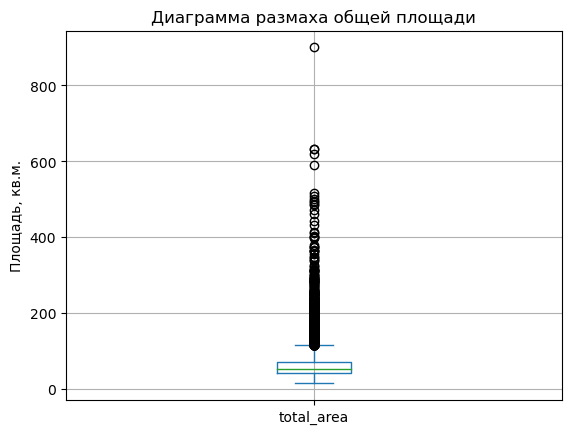

In [19]:
#импортируем библиотиеку matplotlib
import matplotlib.pyplot as plt

#построим диаграмму размаха для общей площади
df_area_notna_kitchen['total_area'].plot(
    kind = 'box',
    grid = True,
    title = 'Диаграмма размаха общей площади',
    ylabel = 'Площадь, кв.м.'
);

Из диаграммы видно, что максимальное значение общей площади равное 900 - одно единственное значение и даже нет близких смежных значений.

Построим еще гистограмму для общей площади:

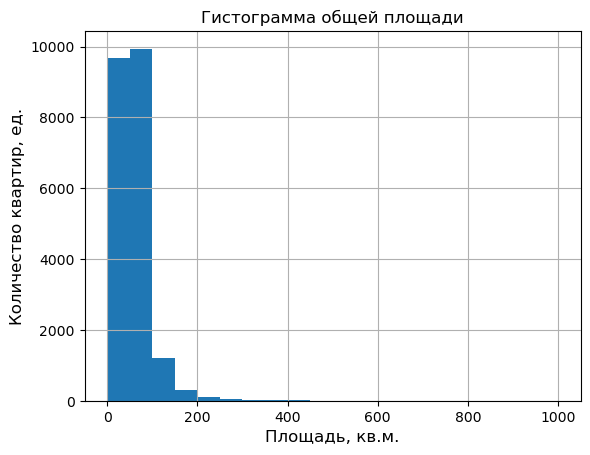

In [20]:
#построим укрупненную гистограмму с 20 "корзинами" (bins = 20) и длиной по оси ординат до 1 000 кв.м. (range = (0, 1000))
df_area_notna_kitchen['total_area'].plot(
    kind = 'hist',
    bins = 20,
    range = (0, 1000),
    grid = True,
    title = 'Гистограмма общей площади')

#подпишем оси графика
plt.xlabel('Площадь, кв.м.', fontsize=12)
plt.ylabel('Количество квартир, ед.', fontsize=12);

Виден основной пик в районе от 300 кв.м., но почти не видно какое количество квартир в районе от 250 до 900 кв.м. Масштабируем гистограмму путем уменьшения значений по абсциссе (кол-ву квартир):

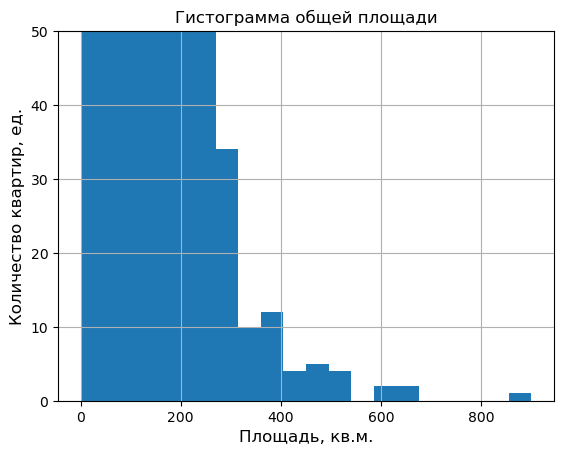

In [21]:
#построим более масштабированную гистограмму с 20 "корзинами" (bins = 20) и длиной по оси ординат до 900 кв.м. (range = (0, 900)),
#но при этом сократив диапазон таких квартир до 50 ед. (ylim = (0, 50))
df_area_notna_kitchen['total_area'].plot(
    kind = 'hist',
    bins = 20,
    range = (0, 900),
    grid = True,
    title = 'Гистограмма общей площади',
    ylim = (0, 50))

#подпишем оси графика
plt.xlabel('Площадь, кв.м.', fontsize=12)
plt.ylabel('Количество квартир, ед.', fontsize=12);

Теперь видно, что площадь 900 кв.м. это точно выбивающееся значение, которое стоит убрать из среза для получения корректного коэффициента.

Тем не менее настораживает небольшой "островок" квартир в районе 600 кв.м.

Чтобы понять стоит его оставлять или нет, нужно проанализировать площадь кухни, может, там похожая картина. Построим диаграмму размаха и гистограмму для площади кухни:

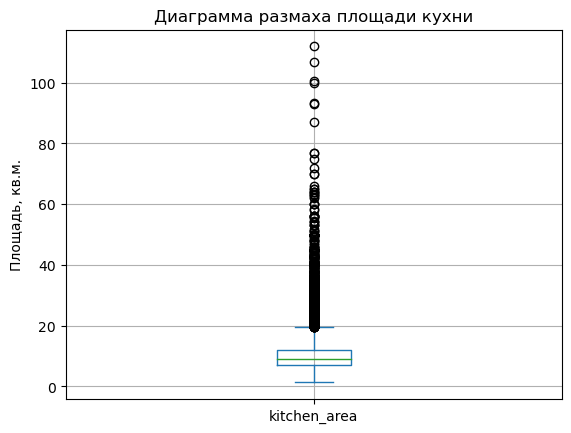

In [22]:
#построим диаграмму размаха для значений площади кухни
df_area_notna_kitchen['kitchen_area'].plot(
    kind = 'box',
    grid = True,
    title = 'Диаграмма размаха площади кухни',
    ylabel = 'Площадь, кв.м.'
);

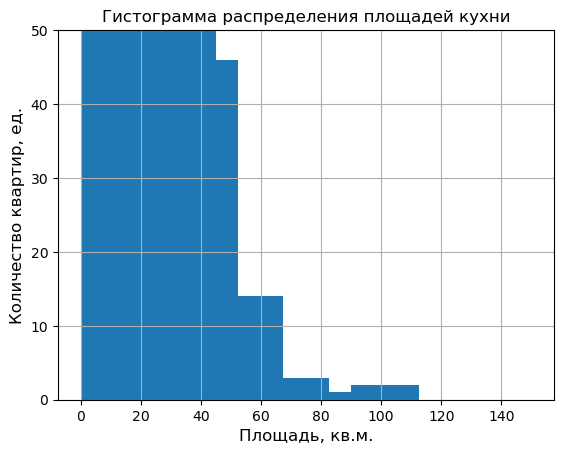

In [23]:
#выведем сразу более масштабированную гистограмму по площади кухни с площадями до 150 кв.м (range = (0, 150)),
#числом "корзин" равным 20 (bins = 20) и количеством квартир, удовлтворяющих указанным параметром до 50 шт. (ylim = (0, 50))
df_area_notna_kitchen['kitchen_area'].plot(
    kind = 'hist',
    bins = 20,
    range = (0, 150),
    grid = True,
    title = 'Гистограмма распределения площадей кухни',
    ylim = (0, 50))

#подпишем оси графика
plt.xlabel('Площадь, кв.м.', fontsize=12)
plt.ylabel('Количество квартир, ед.', fontsize=12);

В принципе, диаграммы размаха и гистограммы между общей площадью и площадью кухни - схожи. Немного сбивает в гистограмме по жилой площади значения в районе 600 кв.м., стоит ли эти площади учитывать при расчете требуемого коэффциента, или отбросить строки с указанным диапазоном?

Стоит еще посмотреть какие значения в столбце "общая площадь" соответствуют пропущенным значениям в столбце "площадь кухни":

In [24]:
#сформиуем срез по пропущенным значениям kitchen_area и столбцу total_area и расположим, полученные значения в порядке убывания
df_area[df_area['kitchen_area'].isna()]['total_area'].sort_values(ascending = False)

14930   500.00
9779    494.10
22006   422.20
5843    400.00
12897   400.00
         ...  
19449    13.20
19437    13.00
19698    13.00
17859    13.00
19795    12.00
Name: total_area, Length: 2076, dtype: float64

Предположения подтвердились - максимальная общая площадь соответствующая пропущенным значениям в столбце "площадь кухни" равна 500 кв.м. Поэтому будем рассчитывать коэффициент отношения средней общей площади к средней площади кухни, отбросив в нашей выборке, где нет пропущенных значений по площади кухни, значения общей площади больше 500 кв.м.:

In [25]:
#рассчитаем коэффициент отношения ср. общей площади к ср. площади кухни из датасета df_area_notna_kitchen
#применив фильтр к столбцу total_area <= 500
area_kof_kitch = (
    df_area_notna_kitchen.loc[df_area_notna_kitchen['total_area'] <= 500, 'total_area'].mean()/
    df_area_notna_kitchen.loc[df_area_notna_kitchen['total_area'] <= 500, 'kitchen_area'].mean()
)

#выведем полученное значение коэффициента
f'Коэффициент отношения средней общей площади к средней площади кухни равен {round(number = area_kof_kitch, ndigits = 2)}'

'Коэффициент отношения средней общей площади к средней площади кухни равен 5.74'

Применим полученный коэффициент к нашему исходному датафрейму (df), заполнив пропуски в столбце "площадь кухни":

In [26]:
#заполняем пропуски в столбце kitchen_area основного df разделив соответствующее значение total_area на area_kof_kitch
df['kitchen_area'] = df['kitchen_area'].fillna(df['total_area'] / area_kof_kitch)

#проверим остались ли пропуски в столбце kitchen_area
f'Количество пропущенных значений в столбце "площадь кухни" равно {df["kitchen_area"].isna().sum()}'

'Количество пропущенных значений в столбце "площадь кухни" равно 0'

Теперь вернемся к жилой площади. Сперва посмотрим в софрмированном датасете df_area есть ли квартиры с пропусками, которые являются студиями и если да, то сколько их:

In [27]:
#посчитаем сколько квартир, где в жилой площади пропущены данные, являются студиями или нет:
df_area[df_area['living_area'].isna() == True]['studio'].value_counts()

False    1858
True        7
Name: studio, dtype: int64

Получается у нас 7 квартир, где пропущена жилая площадь являются студиями.

Тогда мы будем высчитывать 2 коэффициента по жилой площади:
- один с учетом того, что квартира является студией;
- второй, когда квартира не является студией.

Посчитаем коэффициент отношения средней общей площади к средней жилой площади, когда квартира является студией. Сперва сформируем датасет, где есть общая площадь, жилая площадь без пропущенных значений и признак, что квартира является студией и посмотрим его описание:

In [28]:
#сформируем датасет по условиям в living_area нет пропущенных значений и рассматриваемая квартира явялется студией
df_area_notna_liv_studio = df_area.loc[(df['living_area'].notna()) & (df['studio'] == True), ['total_area', 'living_area']]

#выведем описание полученного датасета методом describe()
df_area_notna_liv_studio.describe()

,total_area,living_area
count,139.00,139.00
mean,27.91,19.00
std,9.57,7.35
min,15.50,2.00
25%,24.00,16.00
50%,26.05,18.00
75%,28.95,19.85
max,98.40,68.00


На первый взгляд все выглядит довольно неплохо. Построим еще диаграммы размаха и гистограммы для каждого столбца:

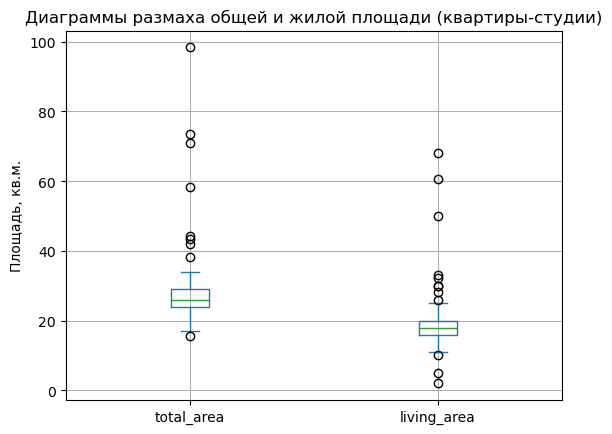

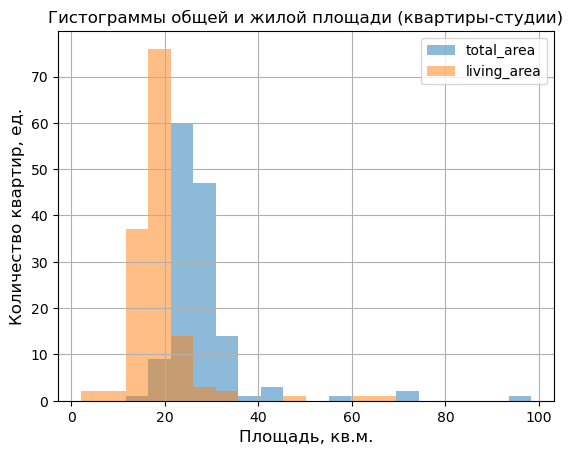

In [29]:
#выведем диаграммы размаха по столбцам total_area и living_area
df_area_notna_liv_studio.plot(
    kind = 'box',
    grid = True,
    title = 'Диаграммы размаха общей и жилой площади (квартиры-студии)',
    ylabel = 'Площадь, кв.м.'
);

#выведем гистограммы по столбцам total_area и living_area
df_area_notna_liv_studio.plot(
    kind = 'hist',
    bins = 20,
    alpha = 0.5,
    grid = True,
    title = 'Гистограммы общей и жилой площади (квартиры-студии)')

#подпишем оси гистограммы
plt.xlabel('Площадь, кв.м.', fontsize=12)
plt.ylabel('Количество квартир, ед.', fontsize=12);

Видим явный выброс по общей площади в районе 100 кв.м. Приблизим гистограмму:

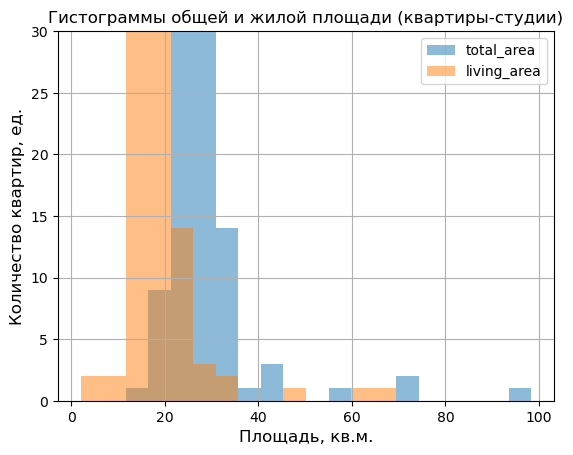

In [30]:
#выведем масштабированные гистограммы по столбцам total_area и living_area
df_area_notna_liv_studio.plot(
    kind = 'hist',
    bins = 20,
    alpha = 0.5,
    ylim = (0, 30),
    grid = True,
    title = 'Гистограммы общей и жилой площади (квартиры-студии)')

#подпишем оси графика
plt.xlabel('Площадь, кв.м.', fontsize=12)
plt.ylabel('Количество квартир, ед.', fontsize=12);

Во всем остальном данные можно соотнести между собой. На всякий случай проверим, есть ли в столбце "жилая площадь", когда кварира является студией, пропущенные значения, которым соответствует общая площадь в районе 100 кв.м.?

In [31]:
#посмотрим какие значения общей площади соответствуют пропущенным значениям жилой площади, при условии, что квартира студия 
df_area[(df_area['living_area'].isna() == True) & (df_area['studio'] == True)]['total_area'].sort_values(ascending = False)

3133    31.00
17926   31.00
2400    27.00
23422   26.00
605     25.00
3856    21.40
8413    19.00
Name: total_area, dtype: float64

Как видим из полученных данных, таких квартир нет. Поэтому при условии, что кварира является студией, при расчете коэффициента отношения средней общей площади к средней жилой площади отбросим все строки, где в столбце "общая площадь" значения больше 80. Посчитаем коэффициент:

In [32]:
#рассчитаем коэффициент отношения ср. общей площади к ср. жилой площади из датасета df_area_notna_liv_studio
#при условии, что квартира является студией, применив фильтр к столбцу total_area <= 80
area_kof_liv_studio = (
    df_area_notna_liv_studio.loc[df_area_notna_liv_studio['total_area'] <= 80, 'total_area'].mean()/
    df_area_notna_liv_studio.loc[df_area_notna_liv_studio['total_area'] <= 80, 'living_area'].mean()
)


#выведем полученное значение коэффициента
f'Коэффициент отношения средней общей площади к средней жилой площади при условии, что квартира является студией,\
 равен {round(number = area_kof_liv_studio, ndigits = 2)}'

'Коэффициент отношения средней общей площади к средней жилой площади при условии, что квартира является студией, равен 1.47'

Применим полученный коэффициент к нашему исходному датафрейму (df), заполнив пропуски в столбце "жилая площадь" при условии, что квартира является студией:

In [33]:
#заполняем пропуски в столбце living_area основного df разделив соответствующее значение total_area на area_kof_liv_studio

for value in df['living_area']:
    df.loc[(df['living_area'].isna() == True) & (df['studio'] == True), 'living_area'] =(
    df.loc[(df['living_area'].isna() == True) & (df['studio'] == True), 'living_area']
    .fillna(df['total_area'] / area_kof_liv_studio)
    )
    
#проверим остались ли пропуски в столбце living_area, когда квартира является студией (df['studio'] == True')
f'Количество пропущенных значений в столбце "жилая площадь" в квартирах, которые относятся к студиям,\
 равно {df[df["studio"] == True]["living_area"].isna().sum()}'

'Количество пропущенных значений в столбце "жилая площадь" в квартирах, которые относятся к студиям, равно 0'

Теперь заполним пропущенные значения жилой площади для квартир, которые не являются студиями. Для этого аналогично квартирам-студиям создадим отдельный датасет, чтобы проанализировать срез и вывести соответствующий коэффициент.

In [34]:
#сформируем датасет по условиям в living_area нет пропущенных значений и рассматриваемая квартира не явялется студией
df_area_notna_liv_not_studio = df_area.loc[(df['living_area'].notna()) & (df['studio'] == False), ['total_area', 'living_area']]

#выведем описание полученного датасета методом describe()
df_area_notna_liv_not_studio.describe()

,total_area,living_area
count,21561.00,21561.00
mean,60.27,34.55
std,34.71,22.07
min,12.00,2.00
25%,40.00,18.70
50%,52.00,30.00
75%,69.71,42.40
max,900.00,409.70


Снова видим в столбце total_area максимальное значение в 900 кв.м. Надо построить диаграммы размаха и гистограммы для каждого столбца:

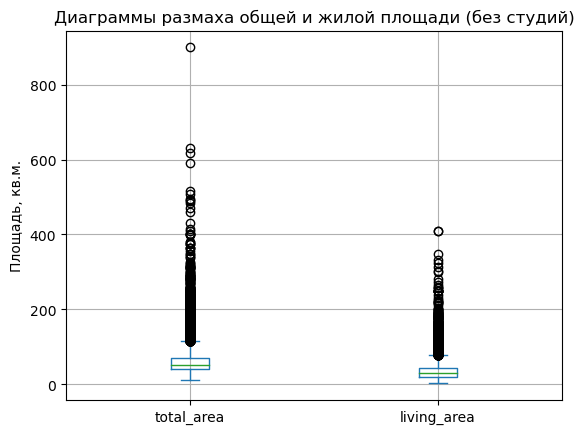

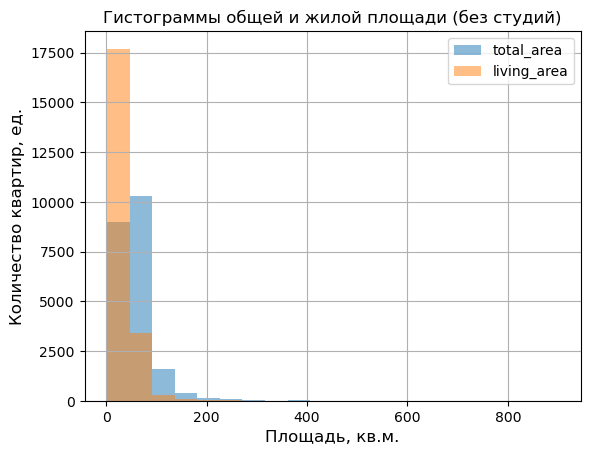

In [35]:
#выведем диаграммы размаха по столбцам total_area и living_area
df_area_notna_liv_not_studio.plot(
    kind = 'box',
    grid = True,
    title = 'Диаграммы размаха общей и жилой площади (без студий)',
    ylabel = 'Площадь, кв.м.'
);

#выведем гистограммы по столбцам total_area и living_area
df_area_notna_liv_not_studio.plot(
    kind = 'hist',
    bins = 20,
    alpha = 0.5,
    grid = True,
    title = 'Гистограммы общей и жилой площади (без студий)')

#подпишем оси гистограммы
plt.xlabel('Площадь, кв.м.', fontsize=12)
plt.ylabel('Количество квартир, ед.', fontsize=12);

Исходя из диаграммы размаха очевиден явный выброс по общей площади в районе 900 кв.м. (как мы и предполагали). Приблизим гистограмму:

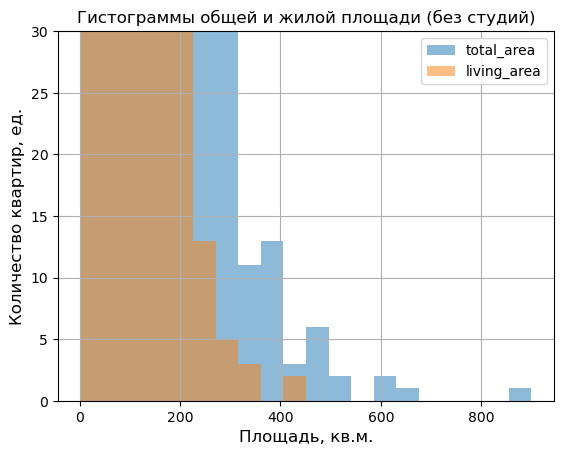

In [36]:
#выведем масштабированные гистограммы по столбцам total_area и living_area
df_area_notna_liv_not_studio.plot(
    kind = 'hist',
    bins = 20,
    alpha = 0.5,
    ylim = (0, 30),
    grid = True,
    title = 'Гистограммы общей и жилой площади (без студий)')

#подпишем оси графика
plt.xlabel('Площадь, кв.м.', fontsize=12)
plt.ylabel('Количество квартир, ед.', fontsize=12);

Да, 900 кв.м. однозначно выброс, да и в районе 500-600 кв.м. тоже нет корреляции.

Поэтому для подсчета коэффициента отношения средней общей площади к средней жилой площади при условии, что квартиры не являются студиями, отбросим все строки, где в столбце "общая площадь" значения больше 500. Посчитаем коэффициент:

In [37]:
#рассчитаем коэффициент отношения ср. общей площади к ср. жилой площади из датасета df_area_notna_liv_not_studio
#при условии, что квартира не является студией, применив фильтр к столбцу total_area <= 500
area_kof_liv_not_studio = (
    df_area_notna_liv_not_studio.loc[df_area_notna_liv_not_studio['total_area'] <= 500, 'total_area'].mean()/
    df_area_notna_liv_not_studio.loc[df_area_notna_liv_not_studio['total_area'] <= 500, 'living_area'].mean()
)

#выведем полученное значение коэффициента
f'Коэффициент отношения средней общей площади к средней жилой площади при условии, что квартира не является студией,\
 равен {round(number = area_kof_liv_not_studio, ndigits = 2)}'

'Коэффициент отношения средней общей площади к средней жилой площади при условии, что квартира не является студией, равен 1.74'

Получили коэффициент отношения средней общей площади к средней жилой площади в квартирах не являющимися студями равным 1,74. Вспомним, что аналогичный коэффициент, но для квартир-студий равен 1,47, что означает, что наши подсчеты верны, т.к. в квартирах-студиях площадь кухни не учитывается и соответственно жилая площадь становится больше.

Применим полученный коэффициент по квартирам не являющимся студиями к нашему исходному датафрейму (df), заполнив оставшиеся пропуски в столбце "жилая площадь":

In [38]:
#заполняем пропуски в столбце living_area основного df разделив соответствующее значение total_area на area_kof_liv_not_studio

df['living_area'] = df['living_area'].fillna(df['total_area'] / area_kof_liv_studio)
    
#проверим остались ли пропуски в столбце living_area, когда квартира не является студией (df['studio'] == False')
f'Количество пропущенных значений в столбце "жилая площадь" в квартирах, которые не являются студиями,\
 равно {df[df["studio"] == False]["living_area"].isna().sum()}'

'Количество пропущенных значений в столбце "жилая площадь" в квартирах, которые не являются студиями, равно 0'

9) Рассмотрим столбец "высота потолков". Сначала отобразим его уникальные значения:

In [39]:
#выведем уникальные значения столбца ceiling_height
df['ceiling_height'].unique()

array([  2.7 ,    nan,   3.03,   2.5 ,   2.67,   2.56,   3.05,   2.75,
         2.6 ,   2.9 ,   2.8 ,   2.55,   3.  ,   2.65,   3.2 ,   2.61,
         3.25,   3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.5 ,
         3.3 ,   2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,
         3.4 ,   3.06,   2.72,   2.54,   2.51,   2.78,   2.76,  25.  ,
         2.58,   3.7 ,   2.52,   5.2 ,   2.87,   2.66,   2.59,   2.  ,
         2.45,   3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,
         3.16,   3.62,   3.12,   2.53,   2.74,   2.96,   2.46,   5.3 ,
         5.  ,   2.79,   2.95,   4.06,   2.94,   3.82,   3.54,   3.53,
         2.83,   4.7 ,   2.4 ,   3.38,   3.01,   5.6 ,   3.65,   3.9 ,
         3.18,   3.35,   2.3 ,   3.57,   2.48,   2.62,   2.82,   3.98,
         2.63,   3.83,   3.52,   3.95,   3.75,   2.88,   3.67,   3.87,
         3.66,   3.85,   3.86,   4.19,   3.24,   4.8 ,   4.5 ,   4.2 ,
         3.36,  32.  ,   3.08,   3.68,   3.07,   3.37,   3.09,   8.  ,
      

Их довольно много. Посмотрим минимальные и максимальные значения данного столбца:

In [40]:
#выведем минимальное и максимальное значение столбца ceiling_height
f"Минимальное значение высоты потолка равно {df['ceiling_height'].min()} м., максимальное - {df['ceiling_height'].max()} м."

'Минимальное значение высоты потолка равно 1.0 м., максимальное - 100.0 м.'

И минимальное и максимальное значения выглядят очень странным. Не могут быть потолки высотой ни 1 м., ни 100 м.

Построим для начала диаграмму разамаха:

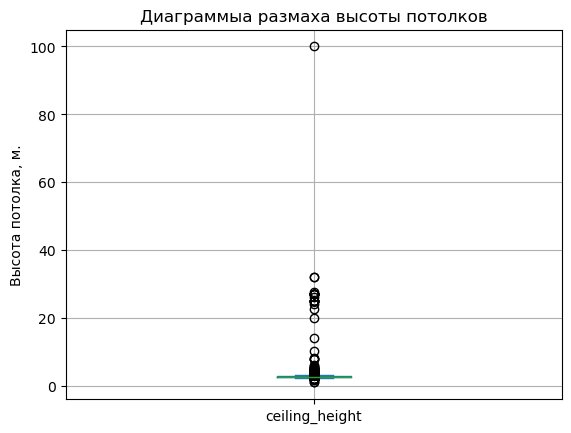

In [41]:
#строим диаграмму размаха для столбца ceiling_height
df['ceiling_height'].plot(
    kind = 'box',
    grid = True,
    title = 'Диаграммыа размаха высоты потолков',
    ylabel = 'Высота потолка, м.'
);

Определенно виден выброс в значении 100 м. Сразу удалим строку с таким значением, т.к. заменить нам его нечем:

In [42]:
#сперва убедимся, что такое значение одно
print(f'Количество значений столбца "высота потолков" равное 100 - {df.query("ceiling_height == 100")["ceiling_height"].count()}')

#удалим строку, в котором высота потолков равна 100, перезаписав исходный датасет с новым условием,
#где значения высоты потолков не должны быть равными 100
df = df.query('ceiling_height != 100')

#проверим остались ли в столбце ceiling_height равные 100
f'Количество значений в столбце "высота потолков" после перезаписи датасета равно {df.query("ceiling_height == 100")["ceiling_height"].count()}'

Количество значений столбца "высота потолков" равное 100 - 1


'Количество значений в столбце "высота потолков" после перезаписи датасета равно 0'

 Увеличим масштаб полученной диаграммы, чтобы рассмотреть другие значения:

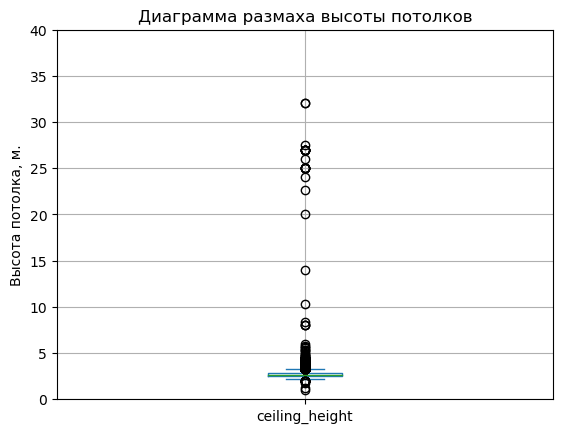

In [43]:
#строим диаграмму размаха для столбца ceiling_height, увеличив масштаб ylim = (0, 40)
df['ceiling_height'].plot(
    kind = 'box',
    grid = True,
    title = 'Диаграмма размаха высоты потолков',
    ylabel = 'Высота потолка, м.',
    ylim = (0, 40)
);

Видим, что есть такие значения, где высота потолков составляет приблизительно 24 - 33 м. Скорее всего, это опечатка и имелось ввиду 2,4 - 3,3 м.

Высоту потолков приблизительно от 7 м. до 20 м. рассмотрим попозже отдельно.

И смущает аномально низкая высота потолков, которая составляет меньше 2,4 м.

Сразу сначала поменяем значения потолков, в которых вероятно произошла опечатка. Сперва сделаем срез столбца "высота потолков" по значениям более 21 м.:

In [44]:
#сделаем срез столбца ceiling_height > 21 и отсортируем их в порядке возрастания
df.query('ceiling_height > 21')['ceiling_height'].sort_values()

20393   22.60
5051    24.00
353     25.00
4621    25.00
18442   25.00
6213    25.00
9334    25.00
11221   25.00
14298   25.00
5641    26.00
21700   27.00
20364   27.00
17756   27.00
10713   27.00
5777    27.00
5219    27.00
4852    27.00
22807   27.00
21256   27.50
3134    32.00
22211   32.00
Name: ceiling_height, dtype: float64

Скорее всего, в первом из выведенных значений высота равна 2,6 м., просто задвоили цифру 2, когда вбивали данные, поменяем данное значение. Во всех остальных значениях явно забыли проставить "запятую", разделим их все на 10 и получим верную высоту:

In [45]:
#заменим значение ceiling_height равное 22,6 на 2,6
df['ceiling_height'] = df['ceiling_height'].replace(22.6, 2.6)

#заменим все значения ceiling_height >= 24 на корректные, поделив их на 10
df.loc[df.ceiling_height >= 24, 'ceiling_height'] = df.loc[df.ceiling_height >= 24, 'ceiling_height'] / 10

Построим еще раз диаграмму размаха:

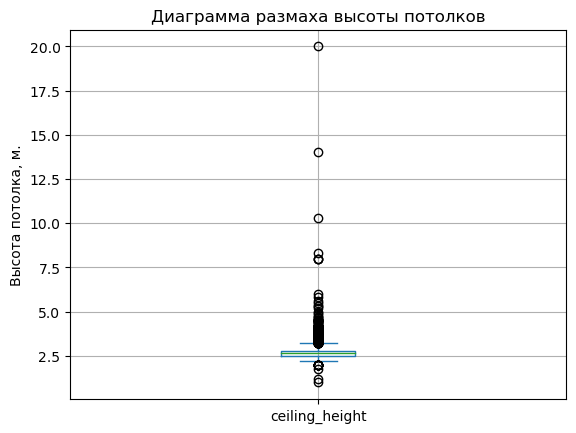

In [46]:
#строим диаграмму размаха для столбца ceiling_height после замены некорректных значений (опечаток) 
df['ceiling_height'].plot(
    kind = 'box',
    grid = True,
    title = 'Диаграмма размаха высоты потолков',
    ylabel = 'Высота потолка, м.',
);

Так-то лучше! Теперь разберемся со значениями от 7 до 20 м. Сперва посмотрим сколько таких значений:

In [47]:
#посчитаем количество значений, в которых 7 < ceiling_height < 20
f"Количество квартир с высотой потолков от 7 до 20 м. равно {df.query('7 <= ceiling_height < 20')['ceiling_height'].count()}"

'Количество квартир с высотой потолков от 7 до 20 м. равно 6'

Это явно странные значения, которые нам тоже нечем заменить, как и значение высота равное 100. Придется тоже удалить эти 6 строк:

In [48]:
#удалим строки, в которых высота потолков равна от 7.5 до 20 м., перезаписав исходный датасет с условием, что ceiling_height < 7.5,
#а также оставим все пропущенные значения (ceiling_height.isna() == True)
df = df.query('ceiling_height < 7.5 | ceiling_height.isna() == True')

Посмотрим, как теперь выглядит диаграмма размаха:

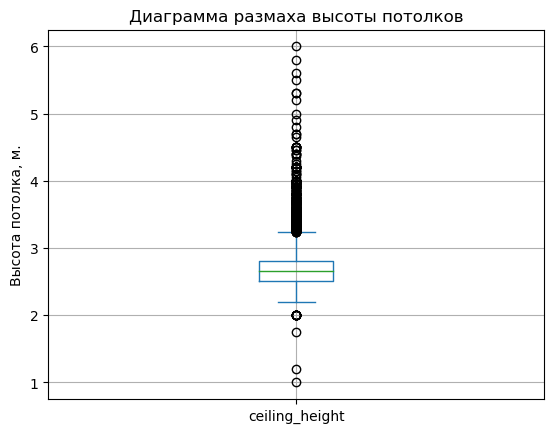

In [49]:
#строим диаграмму размаха для столбца ceiling_height после удаления строк со значениям ceiling_height > 7.5
df['ceiling_height'].plot(
    kind = 'box',
    grid = True,
    title = 'Диаграмма размаха высоты потолков',
    ylabel = 'Высота потолка, м.',
);

Обычно оптимальная высота потолков составляет 2,5 - 3,5 м. Выведем гистограмму с высотой потолков больше 3,5 м. (оптимальной высоты):

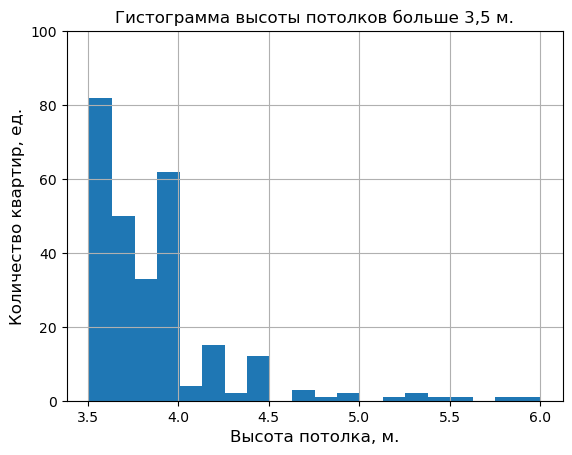

In [50]:
#построим гистрограмму по столбцу ceiling_height > 3,5
df.query('ceiling_height > 3.5')['ceiling_height'].plot(
    kind = 'hist',
    bins = 20,
    grid = True,
    title = 'Гистограмма высоты потолков больше 3,5 м.',
    ylim = (0, 100))

#подпишем оси графика
plt.xlabel('Высота потолка, м.', fontsize=12)
plt.ylabel('Количество квартир, ед.', fontsize=12);

Видим резкое падение повторяющихся значений в районе 4 м. Посмотрим сколько таких квартир:

In [51]:
#посчитаем количество значений ceiling_height >= 4
f"Количество квартир с высотой потолков больше либо равной 4 м. равно {df.query('ceiling_height >= 4')['ceiling_height'].count()}"

'Количество квартир с высотой потолков больше либо равной 4 м. равно 84'

Таких значений относительно много, возможно, квартиры с высокими потолками находятся ближе к центру города и тогда эти данные можно будет использовать для заполнения пропущенных значений для квартир, которые расположены недалеко от центра города. Проверим, действитедльно ли это так: сформируем срез по условию, что высота потолков больше 4 м. и соотнесем такие квартиры с расстоянием от центра города, построив диаграмма рассеяния:

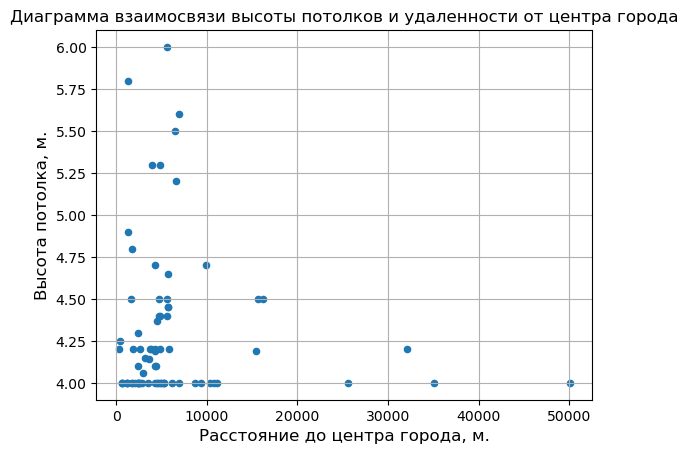

In [52]:
#построим диаграмму рассеяния для квартир с потолками выше 4 м. 
df.loc[(df['ceiling_height'] >= 4) & (df['cityCenters_nearest'].isna() == False),
       ['ceiling_height' ,'cityCenters_nearest']].plot(
    kind = 'scatter',
    x = 'cityCenters_nearest',
    y = 'ceiling_height',
    title = 'Диаграмма взаимосвязи высоты потолков и удаленности от центра города',
    grid = True
)

#подпишем оси графика
plt.xlabel('Расстояние до центра города, м.', fontsize=12)
plt.ylabel('Высота потолка, м.', fontsize=12);

Сильную корреляцию можно проследить у квартир с высотой потолков равным 4 м., расположенным ближе к центру, даже не смотря на то, что иногда встречаются единичные случаи вдали от центра с такими потолками.

Неплохая корреляция также также у квартир ближе к центру и со значениями потолков от 4 до 4,25 м.

Все остальные значения можно отбросить, т.к. они больше елиничные и невзаимосвязанные. Сперва посмотрим сколько таких значений:

In [53]:
#посчитаем количество значений ceiling_height > 4,25
f"Количество квартир с высотой потолков больше либо равной 4 м. равно {df.query('ceiling_height >= 4.25')['ceiling_height'].count()}"

'Количество квартир с высотой потолков больше либо равной 4 м. равно 28'

Довольно приемлимо для удаления. 

Удалим из датасета все строки с высотой потолков больше 4,25 м.:

In [54]:
#удалим строки, в которых ceiling_height > 4.25, а также оставим все пропущенные значения (ceiling_height.isna() == True)
df = df.query('ceiling_height < 4.25 | ceiling_height.isna() == True')

Посмотрим теперь все потолки, что ниже 2,5 м., построим соответствующую гистограмму:

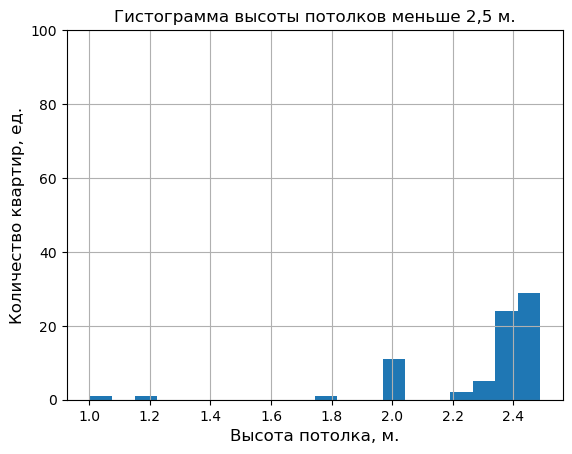

In [55]:
#построим гистрограмму по столбцу ceiling_height < 2,5
df.query('ceiling_height < 2.5')['ceiling_height'].plot(
    kind = 'hist',
    bins = 20,
    grid = True,    
    title = 'Гистограмма высоты потолков меньше 2,5 м.',
    ylim = (0, 100))

#подпишем оси графика
plt.xlabel('Высота потолка, м.', fontsize=12)
plt.ylabel('Количество квартир, ед.', fontsize=12);

В общем видно, что гистограмма значительно падает в районе 2,3 м. высоты потолков. Посмотрим количество квартир с потолками ниже 2,4 м.:

In [56]:
#построим срез датафрейма по ceiling_height <= 2.4
df.query('ceiling_height <= 2.4')['ceiling_height'].value_counts()

2.40    24
2.00    11
2.30     4
2.34     1
1.20     1
2.20     1
1.75     1
2.25     1
1.00     1
Name: ceiling_height, dtype: int64

Количество потолков высотой 2,4 м. еще довольно много, а вот все, что ниже, уже довольно мало таких значений, да и есть неправдоподобные (1 м.). Уберем из датасета все строки со значениями высоты потолков, что ниже 2,4 м. (оставив 2,4), т.к. заменить нам их нечем:

In [57]:
#удалим строки, в которых высота потолков меньше 2,4 м., перезаписав исходный датасет с условием, что ceiling_height >= 2.4,
#а также оставим все пропущенные значения (ceiling_height.isna() == True)
df = df.query('ceiling_height >= 2.4 | ceiling_height.isna() == True')

Сформируем еще раз диаграмму размаха и гистограмму и посмотрим, что получилось, после изменения/удаления аномальных/выбивающихся значений высоты потолков:

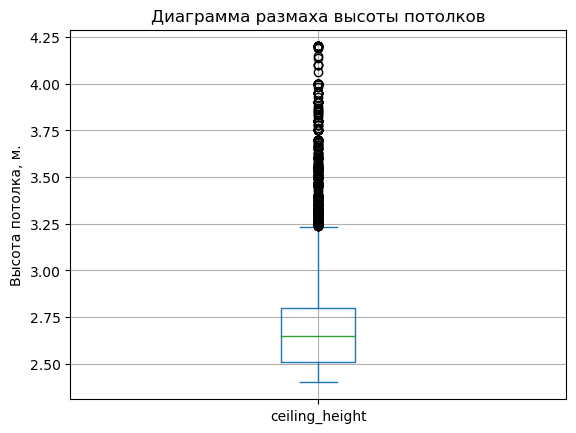

In [58]:
#строим диаграмму размаха для столбца ceiling_height после изменения/удаления аномальных/выбивающихся значений высоты потолков
df['ceiling_height'].plot(
    kind = 'box',
    grid = True,
    title = 'Диаграмма размаха высоты потолков',
    ylabel = 'Высота потолка, м.',
);

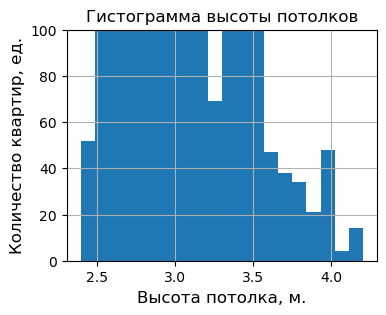

In [59]:
#построим гистрограмму по столбцу ceiling_height после изменения/удаления аномальных/выбивающихся значений высоты потолков
#с количеством повторяющих значений до 100 (ylim = (0, 100))
df['ceiling_height'].plot(
    kind = 'hist',
    bins = 20,
    grid = True,    
    title = 'Гистограмма высоты потолков',
    ylim = (0, 100),
    figsize = (4, 3))

#подпишем оси графика
plt.xlabel('Высота потолка, м.', fontsize=12)
plt.ylabel('Количество квартир, ед.', fontsize=12);

Теперь все выглядит вполне себе приемлимым. Можно использовать полученные данные для заполнения пропущенных значений в столбце "высота потолков".

Можно предположить, что чем ближе к центру города, тем больше высота потолков, так сложилось исторически.

Сперва выведем описание столбца удаленность от центра, а затем уже взглянем на вышеописанную корреляцию:

In [60]:
#опишем столбец cityCenters_nearest методом describe()
df['cityCenters_nearest'].describe()

count   18026.00
mean    14204.21
std      8613.51
min       181.00
25%      9254.75
50%     13107.00
75%     16293.00
max     65968.00
Name: cityCenters_nearest, dtype: float64

Можно отметить, что среднее и медианное значения близки, что хорошо. Но высокий коэффициент разброса значений.

Построим гистограмму распредления значений удаленности от центра:

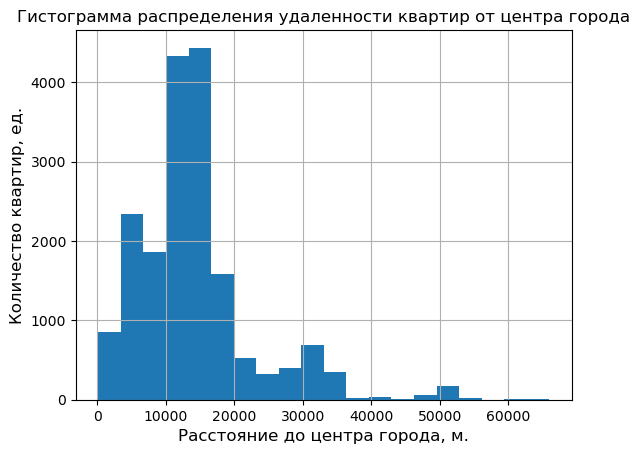

In [61]:
#строим гистограмму для столбца cityCenters_nearest
df['cityCenters_nearest'].plot(
    kind = 'hist',
    bins = 20,
    grid = True,    
    title = 'Гистограмма распределения удаленности квартир от центра города')

#подпишем оси графика
plt.xlabel('Расстояние до центра города, м.', fontsize=12)
plt.ylabel('Количество квартир, ед.', fontsize=12);

И построим диаграмму размаха:

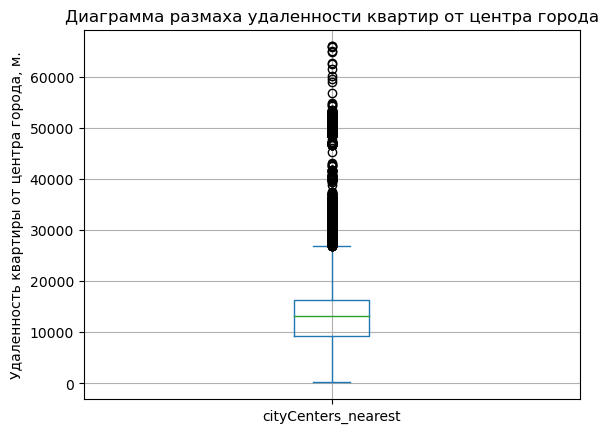

In [62]:
#строим диаграмму размаха для столбца cityCenters_nearest
df['cityCenters_nearest'].plot(
    kind = 'box',
    grid = True,
    title = 'Диаграмма размаха удаленности квартир от центра города',
    ylabel = 'Удаленность квартиры от центра города, м.'
);

Следует отметить, что сперва можно подумать, что на гистограмме и диаграмме размаха есть значения удаленности от центра равные нулю, но если вернуться к описанию указанного столбца, то видим, что минимальное значение равно 181, поэтому все в порядке, дело в только в масштабе выведенных графиков.

Тем не менее, рассмотрим значения, начиная от 35 км., т.к. в некоторых местах от 35 км. имются разрывы гистограммы. Сперва рассмотрим этот кусок на гистограмме:

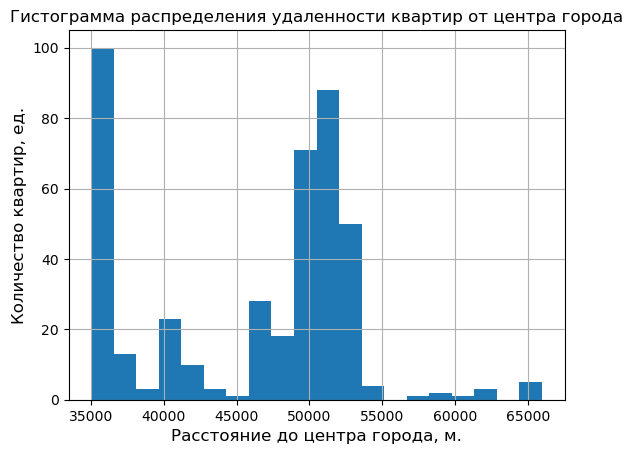

In [63]:
#строим гистограмму для столбца cityCenters_nearest, начиная с 35 км
df.query('cityCenters_nearest >= 35000')['cityCenters_nearest'].plot(
    kind = 'hist',
    bins = 20,
    grid = True,    
    title = 'Гистограмма распределения удаленности квартир от центра города')

#подпишем оси графика
plt.xlabel('Расстояние до центра города, м.', fontsize=12)
plt.ylabel('Количество квартир, ед.', fontsize=12);

Расстояние от 35 км до 55 км можно не трогать. Рассмотрим кусок, начиная с 55 км, построим еще одну гистограмму:

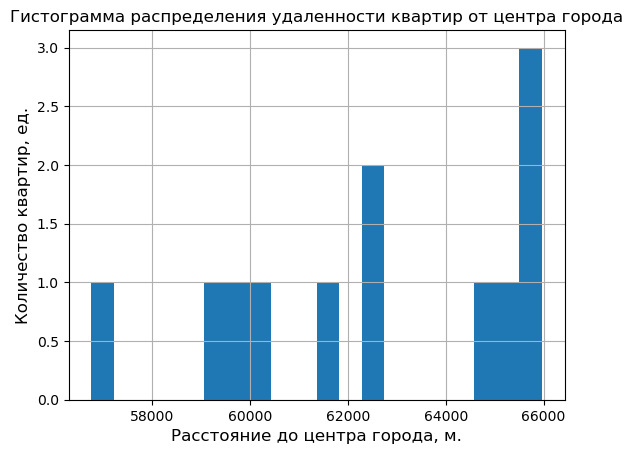

In [64]:
#строим гистограмму для столбца cityCenters_nearest, начиная с 55 км
df.query('cityCenters_nearest >= 55000')['cityCenters_nearest'].plot(
    kind = 'hist',
    bins = 20,
    grid = True,    
    title = 'Гистограмма распределения удаленности квартир от центра города')

#подпишем оси графика
plt.xlabel('Расстояние до центра города, м.', fontsize=12)
plt.ylabel('Количество квартир, ед.', fontsize=12);

Таких значений совсем мало, выведем их количество:

In [65]:
#посчитаем количнество квартир, расположенных в районе 
f"Количество квартир, расположенных на расстоянии более, чем 55 км от центра города равно \
{df.query('cityCenters_nearest >= 55000')['cityCenters_nearest'].count()}"

'Количество квартир, расположенных на расстоянии более, чем 55 км от центра города равно 12'

Но все же оставим их, вдруг они пригодятся.

Теперь рассотрим взаимосвязь значений высоты потолков от удаленности от центра, построим соответствующую диаграмму:

Наши предположения подтвердились: высота потолков действительно выше, чем ближе квартира расположена к центру города.

В соответствии с полученной диаграммой рассеяния разделим рассотяние от центра города на следующие категории:
- до 7 000 м. (центр города)
- от 7 001 м. до 19 000 м.
- от 19 001 м. до 37 000 м.
- от 37 001 м. до 46 000 м.
- от 46 001 м. до 55 000 м.
- от 55 001 м. и больше.

Теперь заполним соответствующими медианными значениями для каждой из категорий пропущенные значения столбца "высота потолков":

In [66]:
#заменим все пропущенные значения потолков для квартир с расстоянием до центра города 7 000 м.
df.loc[(df['cityCenters_nearest'] <= 7000) & (df['ceiling_height'].isna()), 'ceiling_height'] =\
df.query('cityCenters_nearest <= 7000')['ceiling_height'].median()

#теперь от 7 001 м. до 19 000 м.
df.loc[(df['cityCenters_nearest'] >= 7001) & (df['cityCenters_nearest'] <= 19000) & (df['ceiling_height'].isna()),
       'ceiling_height'] = df.query('7001 <= cityCenters_nearest <= 19000')['ceiling_height'].median()

#от 19 001 м. до 37 000 м.
df.loc[(df['cityCenters_nearest'] >= 19001) & (df['cityCenters_nearest'] <= 37000) & (df['ceiling_height'].isna()),
       'ceiling_height'] = df.query('19001 <= cityCenters_nearest <= 37000')['ceiling_height'].median()

#от 37 001 м. до 46 000 м.
df.loc[(df['cityCenters_nearest'] >= 37001) & (df['cityCenters_nearest'] <= 46000) & (df['ceiling_height'].isna()),
       'ceiling_height'] = df.query('37001 <= cityCenters_nearest <= 46000')['ceiling_height'].median()

#от 46 001 м. до 55 000 м..
df.loc[(df['cityCenters_nearest'] >= 46001) & (df['cityCenters_nearest'] <= 55000) & (df['ceiling_height'].isna()),
       'ceiling_height'] = df.query('46001 <= cityCenters_nearest <= 55000')['ceiling_height'].median()

#от 55 001 м. и больше.
df.loc[(df['cityCenters_nearest'] >= 55001) & (df['ceiling_height'].isna()), 'ceiling_height'] =\
df.query('cityCenters_nearest >= 55001')['ceiling_height'].median()

#проверим количество пропущенных значений в столбце ceiling_height
f'Количество оставшихся пропусков в столбце "высота потолков" равно {df["ceiling_height"].isna().sum()}'


'Количество оставшихся пропусков в столбце "высота потолков" равно 2560'

C 9 тыс. пропущенных значений мы снизились до 2,5 тыс. Тем не менее, пропущенных значений довольно много. Скорее всего, они остались там, где неизвестно расстояние от города. Проверим это, выведем срез нашего датасета по пропущенным значениям столбца "расстояние до центра города" и соотнесем со значениями столбца "высота потолков":

In [67]:
#проверим всем ли пропущенным значениям столбца ceiling_height соответствуют пропущенные значения столбца cityCenters_nearest
df[df['ceiling_height'].isna()]['cityCenters_nearest'].unique()

array([nan])

Как видим, гипотеза подтвердилась. Посмотрим как теперь выглядит диаграмма рассеяния столбцов высота потолков и расстояние от центра города:

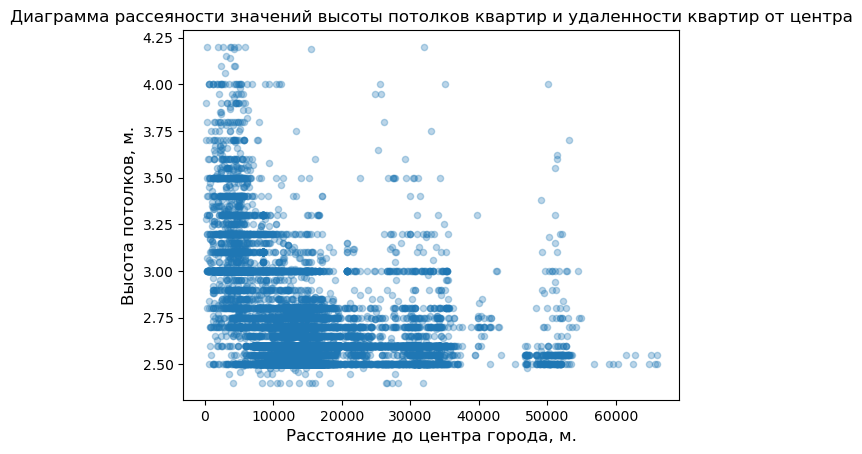

In [68]:
#псотороим диаграмму рассеяния высоты потолков и расстояния от центра города
df.plot(
    kind = 'scatter',
    x = 'cityCenters_nearest',
    y = 'ceiling_height',
    title = 'Диаграмма рассеяности значений высоты потолков квартир и удаленности квартир от центра',
    alpha = 0.3
)

#подпишем оси графика
plt.xlabel('Расстояние до центра города, м.', fontsize=12)
plt.ylabel('Высота потолков, м.', fontsize=12);

Корреляция стала чуть плотнее
Посмотрим, сколько теперь пропущенных значений осталось во всем датасете:

In [69]:
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           2560
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5502
cityCenters_nearest      5482
parks_around3000            0
parks_nearest           15503
ponds_around3000            0
ponds_nearest           14499
days_exposition          3161
dtype: int64

10) Из оставшихся пропущенных значений мы еще не работали с количеством дней размещения объявления (от публикации до снятия) - в нем 3 161 пропущенных значений. Возможно, что пропуски связаны с тем, что квартира так и не продана, поэтому объявление не снято с публикации и посчитать количество дней мы не можем, т.к. не знаем на какую дату выгружен датасет. Проверить данное предположение мы никак не можем, заменить пропущенные значения тоже не можем, поэтому оставим их так.

Также нет возможности заменить пропущенные значения в столбцах расстояние до ближайшего аэропорта и расстояние до центра города. Причиной тому может быть, что в населенном пункте совсем может не быть аэропорта, а центр города (населенного пункта) невозможно определенить, т.к. сам н.п. настолько маленький, что вся площадь и есть центр. Да и медианными значениями несовсем корректно заполнять, т.к. нет очевидной взаимосвязи. Поэтому оставляем как есть.

11) Еще нужно изменить тип данных в столбце дата публикации по очевидным причинам (в столбце указаны даты), а также для дальнейщего использования метода при нахождении дня недели, месяца и т.д. размещения публикации:

In [70]:
#преобразуем тип данных столбца first_day_exposition из object в datetime
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format = '%Y-%m-%dT%H:%M:%S')

#выведем первые 5 строк преобразованного столбца
df['first_day_exposition'].head()

0   2019-03-07
1   2018-12-04
2   2015-08-20
3   2015-07-24
4   2018-06-19
Name: first_day_exposition, dtype: datetime64[ns]

Как видим, в данном столбце отбросилось время, т.к. везде оно равно нулю, осталось только дата, что для нас удобнее и нагляднее. Тип данных преобразовался.

12) Еще преобрауем столбец со стоимостью объекта недвижимости разделив его 1000, т.е. перейдем из рублей (в исх. данные ед. измерения не указана, но все же предположим, что это рубли, т.к. речь идет о России) в тыс. рублей. Это нужно для того, чтобы значения были наглядно отображены на гистограмме (если вернуться в самое начало нашего исследования и посмотреть на гистограмму, то значения отображены не наглядно) и можно упустить какие-либо аномалии:

In [71]:
df['last_price'] = df['last_price']/1000

2.3. Теперь обработаем неявные дубликаты в столбце "наименование населенного пункта". Сперва выведем все уникальные значения данного столбца:

In [72]:
#посчитаем количество его уникальных значений
print(f"Количество уникальных наименований населенных пунктов равно {len(df['locality_name'].unique())}")

#выведем уникальные значения столбца locality_name
df['locality_name'].unique()

Количество уникальных наименований населенных пунктов равно 364


array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

Сперва можно обратить внимание, что отличие некоторых населенных пунктов только в буквах "е" и "ё". Можем заменить все "ё" на "е", чтобы прийти к единообразию и убрать дубликаты:

In [73]:
#заменим методом .str.replace() в столбце locality_name все буквы "ё" на "е"
df['locality_name'] = df['locality_name'].str.replace('ё', 'е')

#еще раз выведем все уникальные значения, чтобы проверить удалась ли замена
df['locality_name'].unique()

array(['Санкт-Петербург', 'поселок Шушары', 'городской поселок Янино-1',
       'поселок Парголово', 'поселок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина',
       'деревня Федоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'поселок Металлострой',
       'поселок городского типа Лебяжье',
       'поселок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'поселок Аннино',
       'поселок городского типа Ефимовский', 'поселок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'поселок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', 'Сланцы', 'село Пут

Замена "ё" на "е" удалась. Теперь удалим типы населенных пунктов, чтобы также сократить количество повторяющихся значений:

In [74]:
#удалим все типы населенных пунктов
df['locality_name'] = df['locality_name'].replace(
    ['коттеджный ', 'станции ', 'садовое товарищество ', 
     'село ', 'городской поселок ', 'деревня ', 'поселок ', 'городского типа ',
     'садоводческое некоммерческое товарищество ', 'при железнодорожной '], '', regex=True)

#выведем количество оставшихся уникальных наименований н.п.
print(f"Количество уникальных наименований населенных пунктов после удаления неявных дубликатов равно {len(df['locality_name'].unique())}")

#выведем получившиеся уникальные значения
df['locality_name'].unique()

Количество уникальных наименований населенных пунктов после удаления неявных дубликатов равно 305


array(['Санкт-Петербург', 'Шушары', 'Янино-1', 'Парголово', 'Мурино',
       'Ломоносов', 'Сертолово', 'Петергоф', 'Пушкин', 'Кудрово',
       'Коммунар', 'Колпино', 'Красный Бор', 'Гатчина', 'Федоровское',
       'Выборг', 'Кронштадт', 'Кировск', 'Новое Девяткино',
       'Металлострой', 'Лебяжье', 'Сиверский', 'Молодцово',
       'Кузьмоловский', 'Новая Ропша', 'Павловск', 'Пикколово',
       'Всеволожск', 'Волхов', 'Кингисепп', 'Приозерск', 'Сестрорецк',
       'Куттузи', 'Аннино', 'Ефимовский', 'Плодовое', 'Заклинье',
       'Торковичи', 'Первомайское', 'Красное Село', 'Понтонный',
       'Сясьстрой', 'Старая', 'Лесколово', 'Сланцы', 'Путилово',
       'Ивангород', 'Шлиссельбург', 'Никольское', 'Зеленогорск',
       'Сосновый Бор', 'Новый Свет', 'Оржицы', 'Кальтино', 'Романовка',
       'Бугры', 'Рощино', 'Кириши', 'Луга', 'Волосово', 'Отрадное',
       'Павлово', 'Оредеж', 'Копорье', 'Молодежное', 'Тихвин', 'Победа',
       'Нурма', 'Синявино', 'Тосно', 'Стрельна', 'Бокситогорск',

С 364 до 305 - вполне себе хорошо удалили неявные дубликаты. 

2.4. Выведем еще раз гистограммы всего датафрейма и также описание каждого столбца, посмотрим, ничего ли мы не упустили:

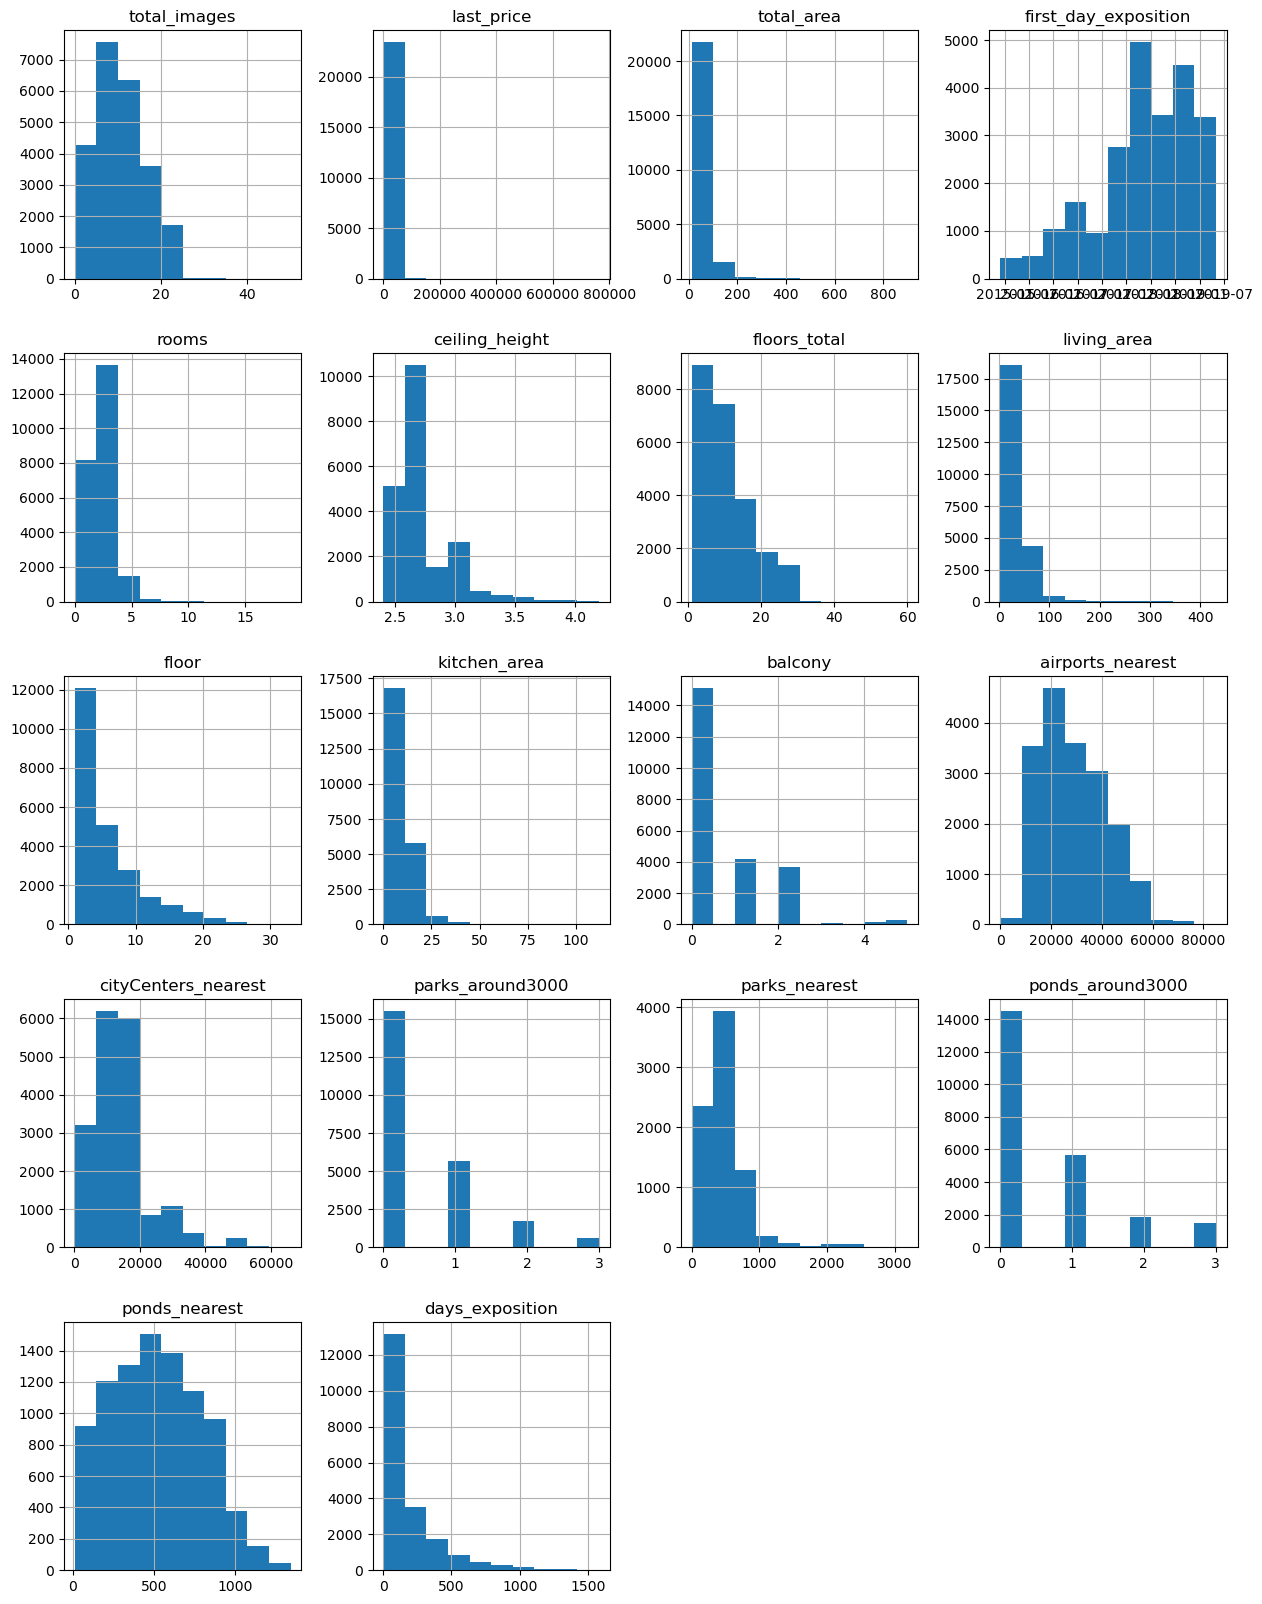

In [75]:
#выведем гистограммы итогового датасета для каждого столбца 
df.hist(figsize=(15, 20));

In [76]:
#выведем описание каждого столбца датасета в траснпонированном виде
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_images,23508.00,9.88,5.68,0.00,6.00,9.00,14.00,50.00
last_price,23508.00,6501.45,10753.34,12.19,3400.00,4635.50,6760.85,763000.00
total_area,23508.00,60.19,35.15,12.00,40.00,52.00,69.60,900.00
rooms,23508.00,2.07,1.08,0.00,1.00,2.00,3.00,19.00
ceiling_height,20948.00,2.71,0.23,2.40,2.60,2.60,2.77,4.20
floors_total,23508.00,10.68,6.59,1.00,5.00,9.00,16.00,60.00
living_area,23508.00,35.06,22.64,2.00,19.00,30.30,42.80,430.52
floor,23508.00,5.88,4.87,1.00,2.00,4.00,8.00,33.00
kitchen_area,23508.00,10.45,6.03,0.00,7.00,9.00,12.00,112.00
balcony,23508.00,0.59,0.96,0.00,0.00,0.00,1.00,5.00


В основном все в порядке, но все же очевидные выбивавающиеся или редкие значения имеются.

Рассмотрим поближе гистограмму по количеству комнат, т.к. видно, что максимальное количество достигает 18 комнат. Что это может быть? И соотнесем это с общей площадью:

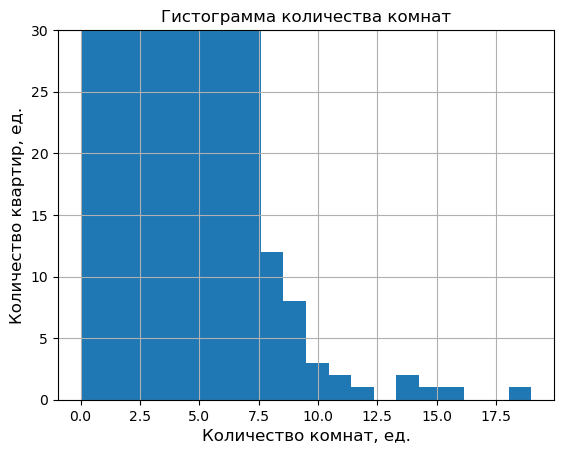

In [77]:
#строим гистограмму для столбца rooms ограничив количество квартир 30 ед. (ylim = (0, 30))
df.rooms.plot(
    kind = 'hist',
    bins = 20,
    grid = True,    
    title = 'Гистограмма количества комнат',
    ylim = (0, 30))

#подпишем оси графика
plt.xlabel('Количество комнат, ед.', fontsize=12)
plt.ylabel('Количество квартир, ед.', fontsize=12);

Очень странное количество комнат в буквально в паре квартир. Построим диаграмму рассеяния взаимосвязи количества комнат и общей площади:

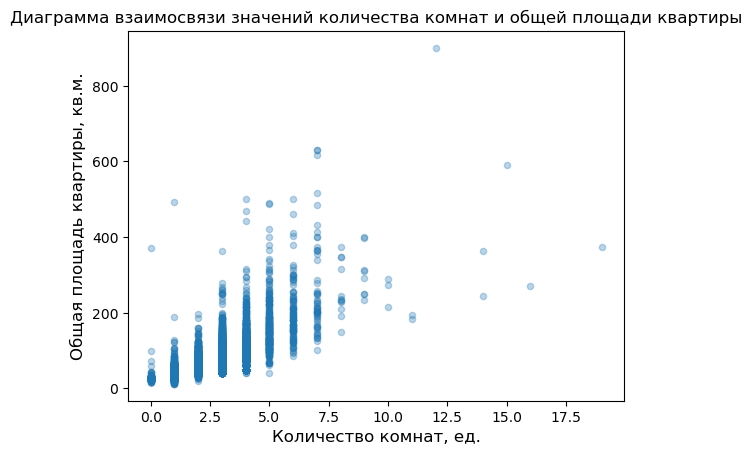

In [78]:
#построим диаграмму рассеяния количества комнат и общей площади
df.plot(
    kind = 'scatter',
    x = 'rooms',
    y = 'total_area',
    title = 'Диаграмма взаимосвязи значений количества комнат и общей площади квартиры',
    alpha = 0.3
)

#подпишем оси графика
plt.xlabel('Количество комнат, ед.', fontsize=12)
plt.ylabel('Общая площадь квартиры, кв.м.', fontsize=12);

Видно, что такая квартира с огромным количеством комнат (18 шт.) - единственная. И вообще очень мало квартир с количеством комнат больше 12, а также с общей площадью больше 600 кв.м. Уберем из датасета указанные выбиывающиеся значения:

In [79]:
#посчитаем число квартир с количеством комнат больше 12, а также число квартир с общей площадью больше 600 кв.м. 
f'Квартир с количеством комнат больше 12 - {df.query("rooms >= 12")["rooms"].count()}.\
 Квартир с общей площадью больше 600 кв.м. - {df.query("total_area >= 600")["total_area"].count()}.'

'Квартир с количеством комнат больше 12 - 6. Квартир с общей площадью больше 600 кв.м. - 4.'

In [80]:
#уберем из датасета квартиры с вышеуказанными выбивающимися параметрами
df = df.query('rooms < 12 & total_area < 600')

Теперь еще рассмотрим общую площадь - смутило очень малое минимальное значение равное 12 кв.м. Сперва приблизим гистограмму:

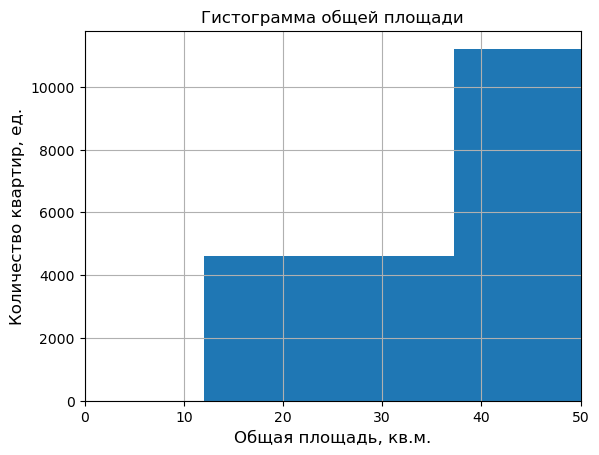

In [81]:
#строим гистограмму для столбца total_area ограничив площадь до 50 кв.м. (xlim = (0, 50))
df.total_area.plot(
    kind = 'hist',
    bins = 20,
    grid = True,    
    title = 'Гистограмма общей площади',
    xlim = (0, 50)
)

#подпишем оси графика
plt.xlabel('Общая площадь, кв.м.', fontsize=12)
plt.ylabel('Количество квартир, ед.', fontsize=12);

Тут все нормально, т.к. таких квартир очень много (около 4000), возможно это даже не квартиры, а комнаты.

Еще насторожила очень низкая минимальная стоимость квартиры в районе 12 тыс. и максимальная 763 млн. посмотрим гистограмму стоимости квартир опоближе:

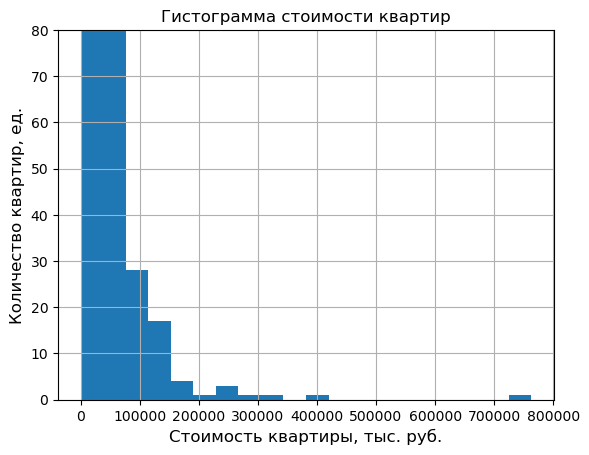

In [82]:
#строим гистограмму для столбца last_price ограничив количество квартир до 80 (ylim = (0, 80))
df.last_price.plot(
    kind = 'hist',
    bins = 20,
    grid = True,    
    title = 'Гистограмма стоимости квартир',
    ylim = (0, 80)
)

#подпишем оси графика
plt.xlabel('Стоимость квартиры, тыс. руб.', fontsize=12)
plt.ylabel('Количество квартир, ед.', fontsize=12);

Точно видно, что значение в 763 млн руб. только у одной квартиры. Еще посмотрим у какого количества квартир стоимость больше 150 млн руб.: 

In [83]:
df.query('last_price >= 150000')['last_price'].count()

14

Таких квартир 14. Интересно, как они коррелируют с расстоянием от центра города. Построим диаграмму рассеяния по стоимости и расстояния от центра:

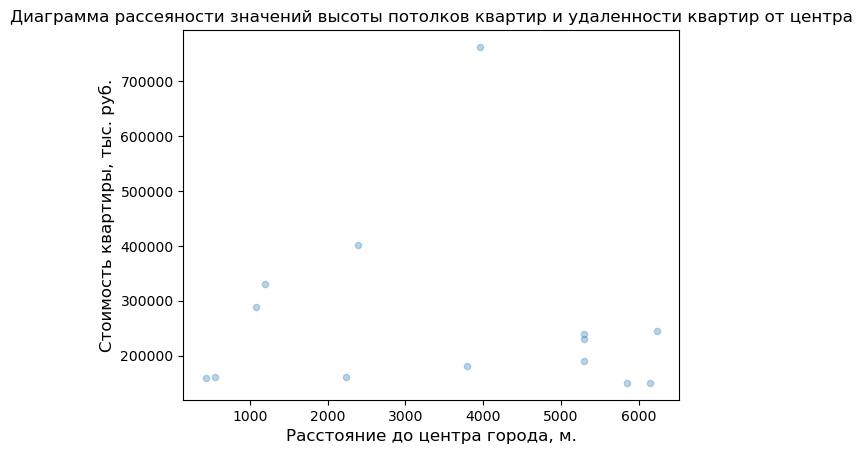

In [84]:
df.query('last_price >= 150000').plot(
    kind = 'scatter',
    x = 'cityCenters_nearest',
    y = 'last_price',
    title = 'Диаграмма рассеяности значений высоты потолков квартир и удаленности квартир от центра',
    alpha = 0.3
)

#подпишем оси графика
plt.xlabel('Расстояние до центра города, м.', fontsize=12)
plt.ylabel('Стоимость квартиры, тыс. руб.', fontsize=12);

Вообще никак не взаимосвязано. Нам точно стоит удалить эти значения.

Теперь надо посмотреть, что с маленькими ценами. Построим гистограмму, где стоимость квартир ниже 1 млн руб.:

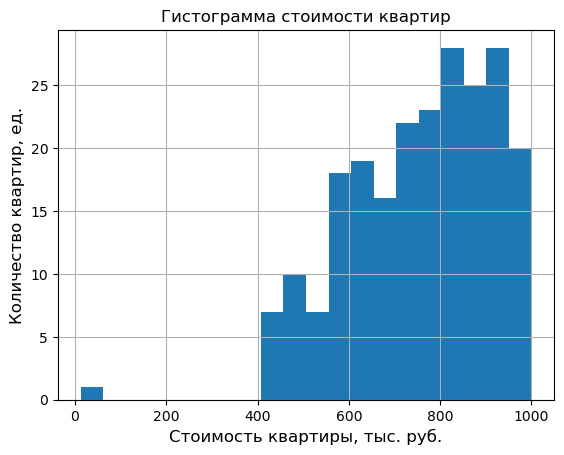

In [85]:
#строим гистограмму для столбца last_price с ценами ниже 1 млн руб. (last_price < 1000)
df.query('last_price < 1000')['last_price'].plot(
    kind = 'hist',
    bins = 20,
    grid = True,    
    title = 'Гистограмма стоимости квартир'
)

#подпишем оси графика
plt.xlabel('Стоимость квартиры, тыс. руб.', fontsize=12)
plt.ylabel('Количество квартир, ед.', fontsize=12);

Явное аномальное значение стоимости квартиры в 12 тыс., удалим его тоже из датасета.

Вообще можно было бы проанализировать и эти слишком высокие и слишкому низкую цены на квартиры, может быть, дело было в опечатке, но оно того не стоит по затртам времени, т.к. их количество невелико. Проще откинуть эти значения:

In [86]:
#убехрем из датасета квартиры стоимость свыше 150 млн руб. и ниже 400 тыс. руб.
df = df.query('400 < last_price < 150000')

2.5. Выведем итоговую информацию о нашем преобразованном датасете после заполнения всех пропусков и где это возможно было на данном этапе удаления аномальных значений:

In [87]:
df = df.reset_index(drop = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23484 entries, 0 to 23483
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23484 non-null  int64         
 1   last_price            23484 non-null  float64       
 2   total_area            23484 non-null  float64       
 3   first_day_exposition  23484 non-null  datetime64[ns]
 4   rooms                 23484 non-null  int64         
 5   ceiling_height        20924 non-null  float64       
 6   floors_total          23484 non-null  float64       
 7   living_area           23484 non-null  float64       
 8   floor                 23484 non-null  int64         
 9   is_apartment          23484 non-null  bool          
 10  studio                23484 non-null  bool          
 11  open_plan             23484 non-null  bool          
 12  kitchen_area          23484 non-null  float64       
 13  balcony         

В столбцах с общим количеством этажей и балконов дробный тип данных преобразуем его в целочисленный, чтобы не было 2,5 балкона или 9,3 этажей:

In [88]:
#переведем типы данных столбцов floors_total и balcony из float в int
df[['floors_total', 'balcony']] = df[['floors_total', 'balcony']].astype('int')

#проверим, удалось ли перевсти в целочисленные значения?
df[['floors_total', 'balcony']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23484 entries, 0 to 23483
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   floors_total  23484 non-null  int32
 1   balcony       23484 non-null  int32
dtypes: int32(2)
memory usage: 183.6 KB


Еще осуществим проверку на явные дубликаты:

In [89]:
f'Количество явных дубликатов в датафрейме составляет {df.duplicated().sum()}'

'Количество явных дубликатов в датафрейме составляет 0'

Проверка прошла успешно. Явных дубликатов не обнаружено.</div>

Пропуски заполнены максимально, типы данных там, где это необходимо изменены. Количество строк, оставшихся от исходного датасета составляет 23 484 (изначально было 23 699), т.е. мы удалили 215 строку или 0,9%, что в пределах нормы.

### Анализ потребности в дополнительной информации, определенной на основании исходнных данных
<a id="dop_info"></a> 

Для дальнейшего исследования добавим следующие столбцы:
- цена одного квадратного метра;
- день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
- месяц публикации объявления;
- год публикации объявления;
- тип этажа квартиры (значения — «первый», «последний», «другой»);
- расстояние до центра города в километрах (переведя из м в км и округлив до целых значений).

1. Добавление столбца "цена одного квадратного метра":

In [90]:
#добавим столбец price_one_meter разделив last_price на total_area
df['price_one_meter'] = df['last_price'] / df['total_area']

2. Добавление столбца с определением дня недели публикации объявления (0 — понедельник, 1 — вторник и так далее):

In [91]:
#добавим столбец с днем недели публикации применив к столбцу first_day_exposition метод dt.weekday
df['weekday_expos'] = df['first_day_exposition'].dt.weekday

3. Добавление столбца "месяц публикации объявления":

In [92]:
#добавим столбец с месяцем публикации применив к столбцу first_day_exposition метод dt.month
df['month_expos'] = df['first_day_exposition'].dt.month 

4. Добавление столбца "год публикации объявления":

In [93]:
#добавим столбец с годом публикации применив к столбцу first_day_exposition метод dt.year
df['year_expos'] = df['first_day_exposition'].dt.year
df['year_expos'].head()

0    2019
1    2018
2    2015
3    2015
4    2018
Name: year_expos, dtype: int64

5. Добавление столбца с типом этажа квартиры (значения — «первый», «последний», «другой»):

In [94]:
#напишем функцию, которая распределяет этажи, на которых находятся квартиры, в зависимости от значения этажа
def floor_type(row):
        if row['floor'] == 1:
            return 'первый'
        elif row['floor'] == row['floors_total']:
            return 'последний'
        else:
            return 'другой'
        
#добавим столбец floor_type и для его наполнения применим полученную выше функцию к столбцу floor 
df['floor_type'] = df.apply(floor_type, axis = 1)

#проверим уникальные значения столбца
df['floor_type'].unique()

array(['другой', 'первый', 'последний'], dtype=object)

6. Добавление столбца "расстояние до центра города в километрах" (переводим из м. в км и округляем до целых значений).

In [95]:
#добавим столбец cityCenters_nearest_km, разделив значения столбца cityCenters_nearest на 1000
df['cityCenters_nearest_km'] = (df['cityCenters_nearest'] / 1000).round(0)

### Исследовательский анализ данных
<a id="analysis"></a> 

Рассмотрим и опишем разные параметры нашего набора данных. Будем выводить гистограммы и описание столбца.

1. Начнем с общей площади:

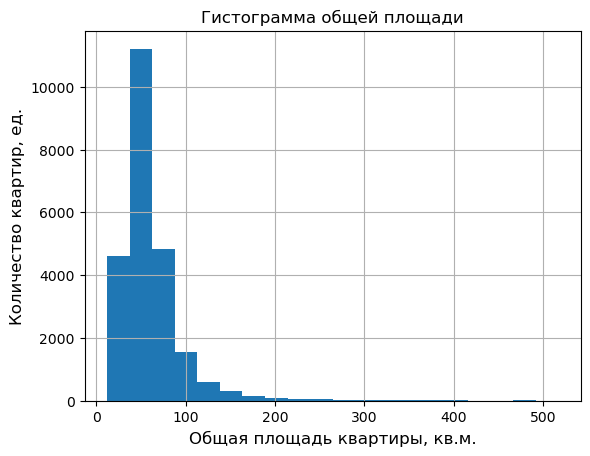

In [96]:
#построим гистограмму для столбца total_area
df['total_area'].plot(
    kind = 'hist',
    bins = 20,
    grid = True,    
    title = 'Гистограмма общей площади'
)

#подпишем оси графика
plt.xlabel('Общая площадь квартиры, кв.м.', fontsize=12)
plt.ylabel('Количество квартир, ед.', fontsize=12);

Масштабируем график, чтобы четче увидеть пиковые значения, для этого рассмотрим квартиры общей площадью до 200 кв.м., т.к. дальше гистограмма сильно идет на спад:

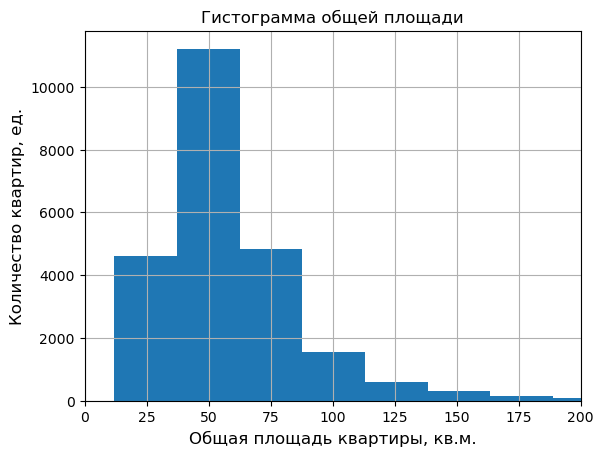

In [97]:
#построим масштабированную гистограмму (xlim = (0, 200)) для столбца total_area
df['total_area'].plot(
    kind = 'hist',
    bins = 20,
    grid = True,    
    title = 'Гистограмма общей площади',
    xlim = (0, 200)
)

#подпишем оси графика
plt.xlabel('Общая площадь квартиры, кв.м.', fontsize=12)
plt.ylabel('Количество квартир, ед.', fontsize=12);

In [98]:
#выведем описание данных столбца total_area
df['total_area'].describe()

count   23484.00
mean       59.86
std        33.11
min        12.00
25%        40.00
50%        52.00
75%        69.50
max       517.00
Name: total_area, dtype: float64

Глядя на полученную гистограмму можно сделать вывод, что распределение нормальное.
Больше всего встречаются квартиры с общей площадью около 52 кв. м. (больше 10 тыс. квартир), т.е. наше медианное значение. Чем больше площадь, тем реже такие квартиры встречаются, что логично, т.к. не каждый может себе позволить покупку больших площадей. Так квартир с небольшой площадью - немного.

2. Теперь рассмотрим жилую площадь:

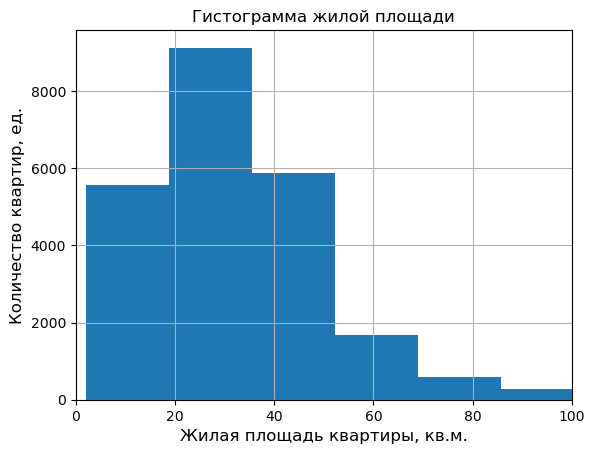

In [99]:
#построим гистограмму для столбца living_area с xlim = (0, 100)
df['living_area'].plot(
    kind = 'hist',
    bins = 20,
    grid = True,    
    title = 'Гистограмма жилой площади',
    xlim = (0, 100)
)

#подпишем оси графика
plt.xlabel('Жилая площадь квартиры, кв.м.', fontsize=12)
plt.ylabel('Количество квартир, ед.', fontsize=12);

In [100]:
#выведем описание данных столбца living_area
df['living_area'].describe()

count   23484.00
mean       34.86
std        21.54
min         2.00
25%        19.00
50%        30.30
75%        42.78
max       337.12
Name: living_area, dtype: float64

У данного параметра тоже наблюдеается нормальное распредление с пиком повторений в районе 30 кв. м., что в принципе соотносится с общей площадью, т.е. жилая занимает около 60%, остальное нежилая. Как и у общей площади, чем больше площадь, тем меньше таких квартир в связи с их дороговизной (вероятно).

3. Площадь кухни:

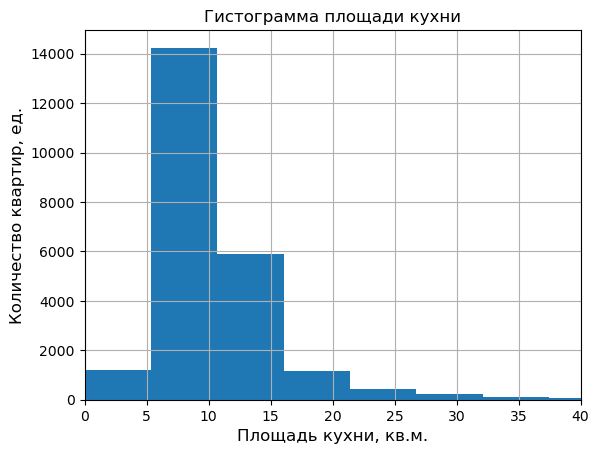

In [101]:
#построим гистограмму для столбца kitchen_area с xlim = (0, 40)
df['kitchen_area'].plot(
    kind = 'hist',
    bins = 20,
    grid = True,    
    title = 'Гистограмма площади кухни',
    xlim = (0, 40)
)

#подпишем оси графика
plt.xlabel('Площадь кухни, кв.м.', fontsize=12)
plt.ylabel('Количество квартир, ед.', fontsize=12);

In [102]:
#выведем описание данных столбца kitchen_area
df['kitchen_area'].describe()

count   23484.00
mean       10.42
std         5.88
min         0.00
25%         7.00
50%         9.00
75%        12.00
max       107.00
Name: kitchen_area, dtype: float64

Распределение значений площади кухни тоже является нормальным. Следует отметить, что минимальная площадь кухни равно нулю, но, как мы ранее предположили (еще в Шаге 2 "Предобработка данных"), такая ситуация возникает, когда квартира является студией. Больше всего квартир с площадью кухни в районе 9 кв. м. Дальше гистограмма, как и в 2-х предыдущих, идет на спад по той же причине: чем больше площадь, тем дороже квартира, тем меньше людей способны ее купить.

4. Цена объекта:

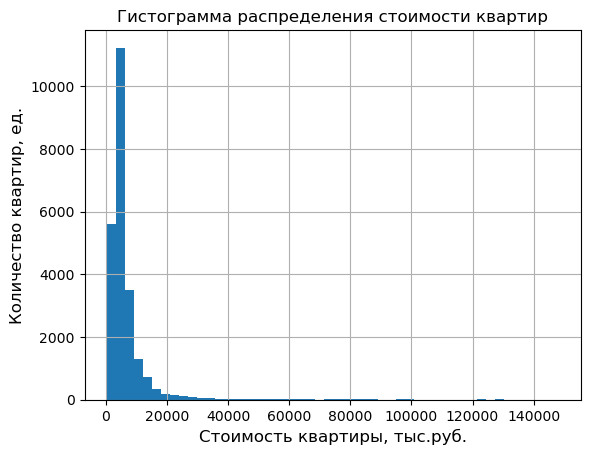

In [103]:
#построим гистограмму для столбца last_price
df['last_price'].plot(
    kind = 'hist',
    bins = 50,
    grid = True,    
    title = 'Гистограмма распределения стоимости квартир'
)

#подпишем оси графика
plt.xlabel('Стоимость квартиры, тыс.руб.', fontsize=12)
plt.ylabel('Количество квартир, ед.', fontsize=12);

In [104]:
#выведем описание данных столбца last_price
df['last_price'].describe()

count    23484.00
mean      6302.52
std       7056.51
min        430.00
25%       3400.00
50%       4622.50
75%       6750.00
max     148000.00
Name: last_price, dtype: float64

Больше всего квартир стоимостью в районе 4,5 млн руб. Что в приниципе является адекватной рыночной ценой для квартир общей площадью около 50 кв. м. (медианное значение), конечно, много зависит от населенного пункта, но, скорее всего, больше всего объявлений было по Санкт-Петербургу. 

5. Количество комнат:

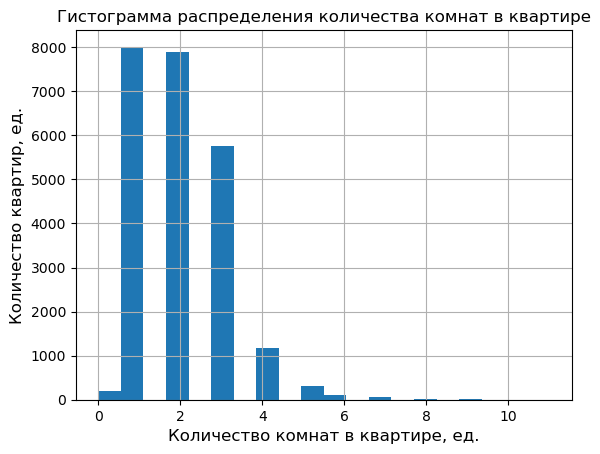

In [105]:
#построим гистограмму для столбца rooms
df['rooms'].plot(
    kind = 'hist',
    bins = 20,
    grid = True,    
    title = 'Гистограмма распределения количества комнат в квартире'
)

#подпишем оси графика
plt.xlabel('Количество комнат в квартире, ед.', fontsize=12)
plt.ylabel('Количество квартир, ед.', fontsize=12);

In [106]:
#выведем описание данных столбца rooms
df['rooms'].describe()

count   23484.00
mean        2.06
std         1.05
min         0.00
25%         1.00
50%         2.00
75%         3.00
max        11.00
Name: rooms, dtype: float64

Больше всего однокомнатных и двухкомнатных квартир, их значения распределились почти поровну - почти по 8 тыс. квартир каждого типа, но однокомнатных чуточку, но все же больше. Поменьше трехкомнатных квартир, около 6 тыс., остальные идут на спад.
Нужно, отметить, что есть квартиры, в которых указано количество комнат равное 0, их порядка 100 ед. Ранее мы предполагали, что такие квартиры относятся к студяим. Выведем дополнительную проверку. Сперва посчитаем сколько всего таких квартир, где указано 0 комнат:

In [107]:
#выведем количество квартир, в которых указано 0 комнат
df[df['rooms'] == 0]['rooms'].count()

193

Таких квартир 193. Теперь посмотрим сколько из них студий:

In [108]:
#посчитаем количество квартир, в которых кол-во комнат равно нулю и в объявлении указано, что эта квартира - студия
df[(df['rooms'] == 0) & (df['studio'] == True)]['rooms'].count()

134

134 являются студиями, инетресно, а что с остальными 59 квартирами? Выведем их площадь:

In [109]:
#выведем площади квартир, в которых кол-во комнат равно нулю и в объявлении указано, что эта квартира не является студией
df[(df['rooms'] == 0) & (df['studio'] == False)]['total_area'].sort_values()

9333     16.00
19300    20.00
19874    21.00
1560     22.00
17660    22.50
938      23.00
11585    23.06
1610     23.98
22370    24.00
2992     24.00
4080     24.00
10194    24.00
17535    24.00
12579    24.20
346      25.00
9779     25.00
18616    25.00
5698     25.00
4833     25.00
19865    25.00
4397     25.00
15136    25.20
10511    25.27
19738    25.41
17877    25.90
11598    26.00
10952    26.00
10936    26.00
773      26.10
14968    26.10
6553     26.80
15297    27.00
12301    27.00
2513     27.10
11057    27.30
7748     27.30
11228    27.32
20604    27.50
23230    27.70
19822    28.00
6413     28.00
16287    28.01
17568    28.05
13829    28.20
9506     28.30
21105    28.50
23378    29.00
18383    29.00
7222     30.00
19557    30.50
6743     31.00
17641    31.10
6946     32.30
21433    34.00
503      34.40
4641     35.00
832      35.00
7174     42.63
19216   371.00
Name: total_area, dtype: float64

Нам попалось одно точно выбивающее значение, равное 371 кв. м. Если остальные еще как-то могут быть, например, однокмнатными или студями, что квартира с площадью 371 кв. м. - точно нет. Предлагаю строку с таким значением исключить из датасета.

По остальным подумать - могут ли они относиться к однокомнатным квартирам, для этого выведем среднюю и медианные площади однокомнатной квариры, а также минимальное и максимальное значения.

При этом квартиры с количеством комнат равным 0 и являющимися студиями отнесем к однокомнатным квартирам:

In [110]:
#отнесем квартиры с количеством комнат равным 0 и являющимися студиями к однокомнатным
df.loc[(df['rooms'] == 0) & (df['studio'] == True), 'rooms'] = \
df.loc[(df['rooms'] == 0) & (df['studio'] == True), 'rooms'].replace(0, 1)

#удалим строку, в которой площадь квартиры с нулевым количсетвом комнат, равна 371
df = df.query('rooms != 0 & total_area != 371')

#посчитам среднюю площадь однокомнатной квартиры
print(f"Средняя площадь однокомнатной квартиры равна {df[df['rooms'] == 1]['total_area'].mean():.2f}")
print(f"Медианное значение площади однокомнатной квартиры равно {df[df['rooms'] == 1]['total_area'].median()}")
f"Минимальная площадь однокомнатной квартиры равна {df[df['rooms'] == 1]['total_area'].min()}\
, максимальная - {df[df['rooms'] == 1]['total_area'].max()}"

Средняя площадь однокомнатной квартиры равна 37.47
Медианное значение площади однокомнатной квартиры равно 36.4


'Минимальная площадь однокомнатной квартиры равна 12.0, максимальная - 494.1'

Среднее и медианное значения коррелируют и таких значений плюс/минус у нас достаточно, чтобы перенести их в категорию однокомнатных квартир.

Но вот выпало очень странное значение максимальной площади квартиры - 494,1 кв. м. Это однозачно аномальное значение. Построим диаграмму размаха для площади однокомнатных квартир: 

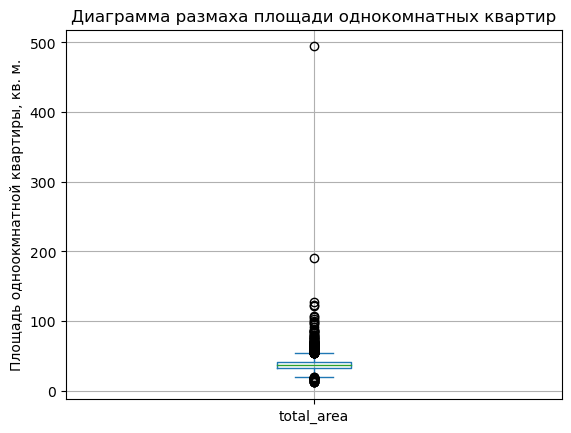

In [111]:
#строим диаграмму размаха для столбца total_area у однокомнатных квартир (df['rooms'] == 1)
df[df['rooms'] == 1]['total_area'].plot(
    kind = 'box',
    grid = True,
    title = 'Диаграмма размаха площади однокомнатных квартир',
    ylabel = 'Площадь одноокмнатной квартиры, кв. м.',
);

Что-то квартир с одной комнатой и очень большими площадями очень много. Построим еще гистограмму:

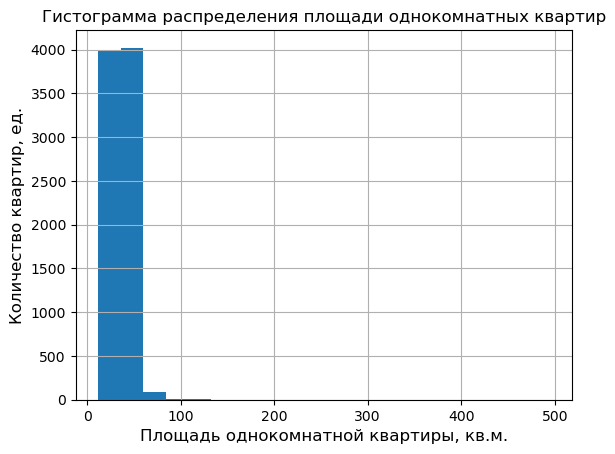

In [112]:
#построим гистограмму для столбца total_area у однокомнатных квартир (df['rooms'] == 1)
df[df['rooms'] == 1]['total_area'].plot(
    kind = 'hist',
    bins = 20,
    grid = True,    
    title = 'Гистограмма распределения площади однокомнатных квартир'
)

#подпишем оси графика
plt.xlabel('Площадь однокомнатной квартиры, кв.м.', fontsize=12)
plt.ylabel('Количество квартир, ед.', fontsize=12);

Видим, что такие значения есть. Приблизим гистограмму:

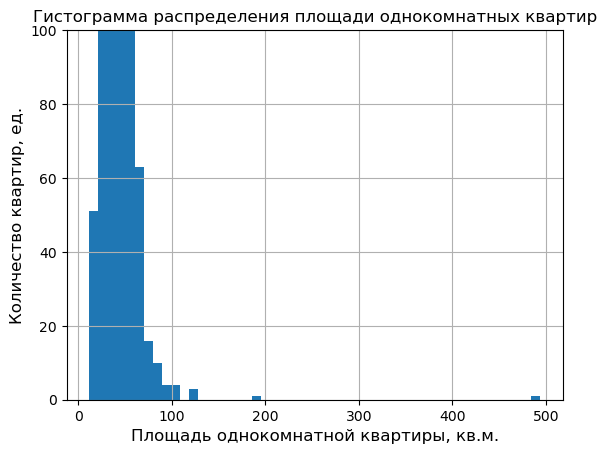

In [113]:
#приблизим гистограмму (ylim = (0, 100))
df[df['rooms'] == 1]['total_area'].plot(
    kind = 'hist',
    bins = 50,
    grid = True,    
    title = 'Гистограмма распределения площади однокомнатных квартир',
    ylim = (0, 100)
)

#подпишем оси графика
plt.xlabel('Площадь однокомнатной квартиры, кв.м.', fontsize=12)
plt.ylabel('Количество квартир, ед.', fontsize=12);

Очень странные значения, когда однокмонатные квартиры по площади равны около 100 кв. м. Удалим все значения, где площадь квартир больше 100 кв. м.  остальные трогать не будем, т.к. там много значений и мы можем удалить лишнюю информацию. В случае чего будем иметь эту аномалию при формировании последующего анализа.

In [114]:
#удаляем строки датафрейма, в которых площадь однокомнатных квартир больше 100 кв. м.
df = df.drop(df[(df['rooms'] == 1) & (df['total_area'] >= 100)].index)

Вернемся к нашим строкам, в которых кол-во комнат равно нули при этом объект недвидимости не является студией. Все отправим их в однокомнатные квартиры, т.к. диапазоны их площади входят в диапазон площадей однокомнатных квартир.

In [115]:
#отнесем квартиры с количеством комнат равным 0 и не являющимися студиями к однокомнатным
df.loc[(df['rooms'] == 0) & (df['studio'] == False), 'rooms'] = \
df.loc[(df['rooms'] == 0) & (df['studio'] == False), 'rooms'].replace(0, 1)

#проверим какие теперь уникальные значения комнат в квартирах:
df['rooms'].unique()

array([ 3,  1,  2,  4,  5,  6,  7, 11,  8, 10,  9], dtype=int64)

От нулей избавились построим еще раз гистограмму и выведем описание столбца количество комнат:

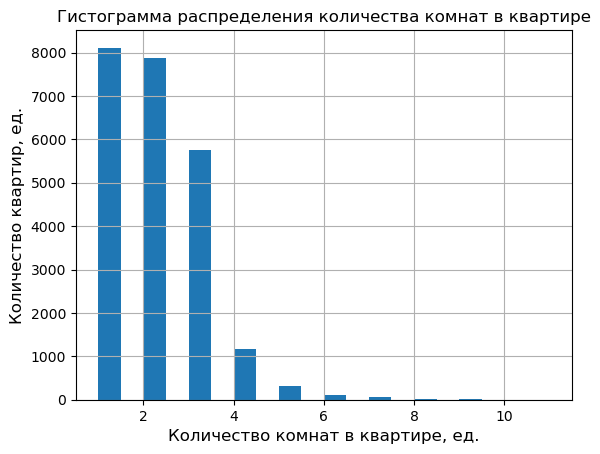

In [116]:
#построим гистограмму для столбца rooms
df['rooms'].plot(
    kind = 'hist',
    bins = 20,
    grid = True,    
    title = 'Гистограмма распределения количества комнат в квартире'
)

#подпишем оси графика
plt.xlabel('Количество комнат в квартире, ед.', fontsize=12)
plt.ylabel('Количество квартир, ед.', fontsize=12);

In [117]:
#выведем описание данных столбца rooms
df['rooms'].describe()

count   23416.00
mean        2.07
std         1.04
min         1.00
25%         1.00
50%         2.00
75%         3.00
max        11.00
Name: rooms, dtype: float64

Все в порядке, значения теперь не кажутся очень странными, переходим к следующему параметру.

6. Высота потолков:

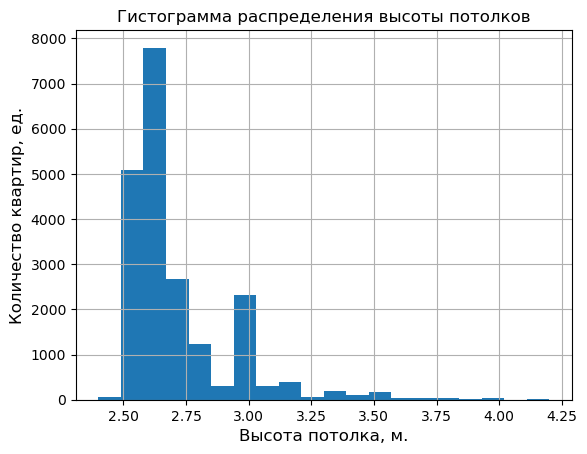

In [118]:
#построим гистограмму для столбца ceiling_height
df['ceiling_height'].plot(
    kind = 'hist',
    bins = 20,
    grid = True,    
    title = 'Гистограмма распределения высоты потолков'
)

#подпишем оси графика
plt.xlabel('Высота потолка, м.', fontsize=12)
plt.ylabel('Количество квартир, ед.', fontsize=12);

In [119]:
#выведем описание данных столбца ceiling_height
df['ceiling_height'].describe()

count   20879.00
mean        2.71
std         0.23
min         2.40
25%         2.60
50%         2.60
75%         2.76
max         4.20
Name: ceiling_height, dtype: float64

С потолками мы очень много работали в предобработке данных. Сейчас на гистограмме видно, что распредление нормальное с двумя пиками: первый на высоте потолков 2,6 м., второй - около 3,0 м. И тоже тут прослеживается взаимосвязь: чем выше потолки, тем меньше количество квартир с такими потолками. Медианное и среднее значения очень близки друг к другу, что хорошо. Стандартное отклонение небольшое.

7. Этаж квартиры:

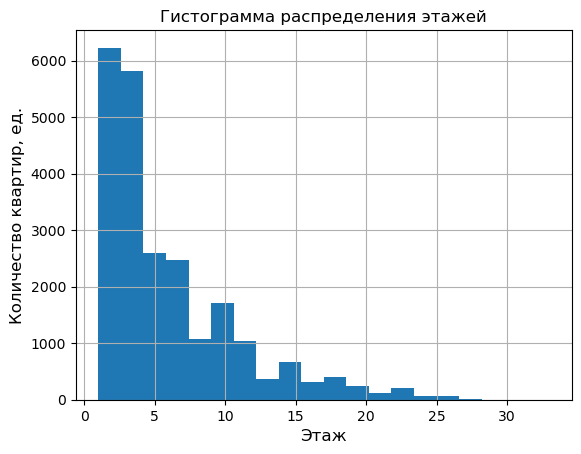

In [120]:
#построим гистограмму для столбца floor
df['floor'].plot(
    kind = 'hist',
    bins = 20,
    grid = True,    
    title = 'Гистограмма распределения этажей'
)

#подпишем оси графика
plt.xlabel('Этаж', fontsize=12)
plt.ylabel('Количество квартир, ед.', fontsize=12);

In [121]:
#выведем описание данных столбца floor
df['floor'].describe()

count   23416.00
mean        5.87
std         4.86
min         1.00
25%         2.00
50%         4.00
75%         8.00
max        33.00
Name: floor, dtype: float64

In [122]:
#выведем топ 5 этажей
df['floor'].value_counts(ascending = False).head()

2    3335
3    3045
1    2895
4    2778
5    2595
Name: floor, dtype: int64

Видим пик значений квартир на 2 и 3 этажах - это вполне объяснимо, т.к. в дореволюционные времена часто строили трехэтажные здания + прибавляется та часть квартир из высокоэтажек + первые этажи часто занимают какие-либо организациями, соответственно вероятность, что квартир на 2 и 3 этаж будет больше, чем других - выше.

Затем идет первый этаж. В 5-ку большинства этажей попадают также квартиры, расположенные на 4 и 5 этажах, что тоже объясняется строительством в послереволюционный период 5-иэтажек + прибавляется та часть квартир на 4 и 5 этажах из высокоэтажек.

Количество квартир расположенных на высоких этажах имеет динамику к уменьшению, т.к.:
- высоких домов не так много
- т.к. больше 5-иэтажек, чем более высоких домов, вероятность, что квартир в пределах 5 этажей будет больше много выше.

8. Этаж квартиры - тут воспользуемся нашим новым созданным столбцом с типом этажа квартиры:

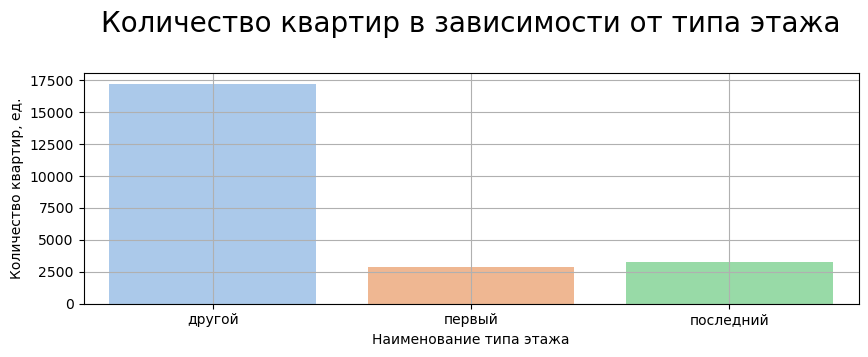

In [123]:
#зададим размер графика
plt.figure(figsize=(10,3))

#задаем цветовую палитру
sns.set_palette('pastel')

#построим столбчатую диаграмму для столбца floor_type
sns.barplot(
    data=df.groupby( #сгруппируем датасет по типу этажа ('floor_type')
        'floor_type', as_index=False
    ).agg(count=('floor', 'count')), #посчитаем какое количество квартир приходится для каждого типа
    x='floor_type', #по оси х отложим наименования типа этажа
    y='count' #по оси у - количество таких квартир для каждого типа
)

#зададим сетку
plt.grid() 

#формируем заголовок графика и подписи осей средствами matplotlib
plt.title('Количество квартир в зависимости от типа этажа\n', fontsize=20)
plt.xlabel('Наименование типа этажа', fontsize=10)
plt.ylabel('Количество квартир, ед.', fontsize=10);

Описание столбца выводить не будем, т.к. это не количественный параметр, а категориальный. Было высоковероятно, что квартир с этажами типа "другой" будт больше всего. Интересно, что квартир, находящихся на первом этаже меньше, чем на последнем, ненамного, но все же меньше. 

9. Общее количество этажей в доме:

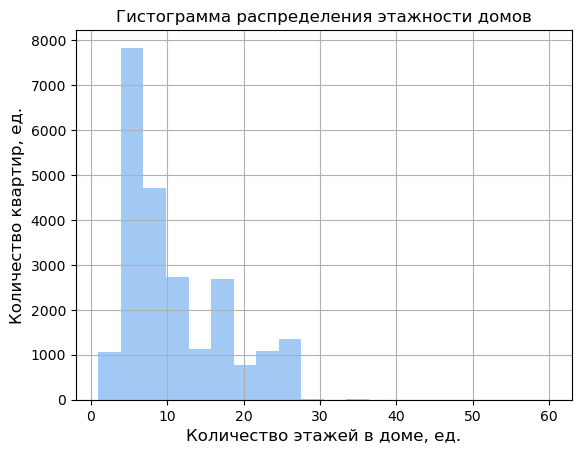

In [124]:
#построим гистограмму для столбца floors_total
df['floors_total'].plot(
    kind = 'hist',
    bins = 20,
    grid = True,    
    title = 'Гистограмма распределения этажности домов'
)

#подпишем оси графика
plt.xlabel('Количество этажей в доме, ед.', fontsize=12)
plt.ylabel('Количество квартир, ед.', fontsize=12);

In [125]:
#выведем описание данных столбца floors_total
df['floors_total'].describe()

count   23416.00
mean       10.67
std         6.59
min         1.00
25%         5.00
50%         9.00
75%        16.00
max        60.00
Name: floors_total, dtype: float64

In [126]:
#выведем топ 5 по общему количеству этажей
df['floors_total'].value_counts(ascending = False).head()

5     5748
9     3749
16    1369
12    1355
4     1184
Name: floors_total, dtype: int64

Больше всего пятиэтажек и девятиэтажек - это стандартное количество этажей, котороые чаще всего строилось в послереволюционный период. 16-и и 19-иэтажных домов почти поровну, 4-этажки чуть от них отстают. Одноэтажных домов немного, но все же почти на уровне 15-иэтажек. То есть наши предположения указанные выше подтверждаются.

10. Расстояние до центра города в метрах:

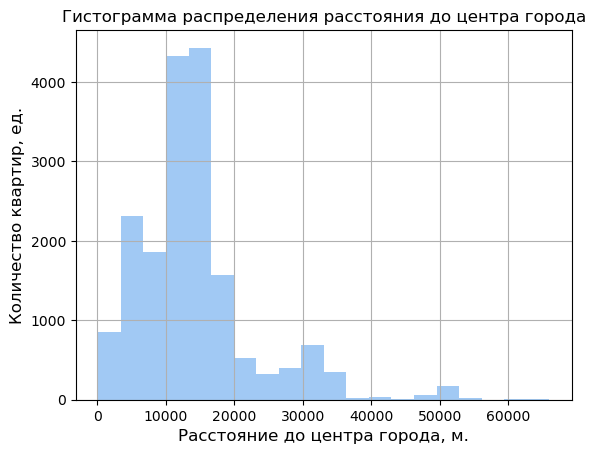

In [127]:
#построим гистограмму для столбца cityCenters_nearest
df['cityCenters_nearest'].plot(
    kind = 'hist',
    bins = 20,
    grid = True,    
    title = 'Гистограмма распределения расстояния до центра города'
)

#подпишем оси графика
plt.xlabel('Расстояние до центра города, м.', fontsize=12)
plt.ylabel('Количество квартир, ед.', fontsize=12);

In [128]:
#выведем описание данных столбца cityCenters_nearest
df['cityCenters_nearest'].describe()

count   17962.00
mean    14222.11
std      8616.19
min       181.00
25%      9284.50
50%     13114.00
75%     16293.00
max     65968.00
Name: cityCenters_nearest, dtype: float64

На гистограмме видим 2 пика расстояний до центра города: около 5 км. и около 15 км. Чем дальше расстояние от центра города, тем меньше количество квартир по причине того, что сам город более густонаселен, чем дальше уходим в Ленинградску область, тем меньше строится домов и много просто свободных участков для с/х работ, а также расположены леса и водоемы. (Тут стоит сделать оговорку, что точкой отсчета - центром города - является центр города Санкт-Петербург, а все н.п. расположены в Ленинградской области).

11. Расстояние до ближайшего аэропорта:

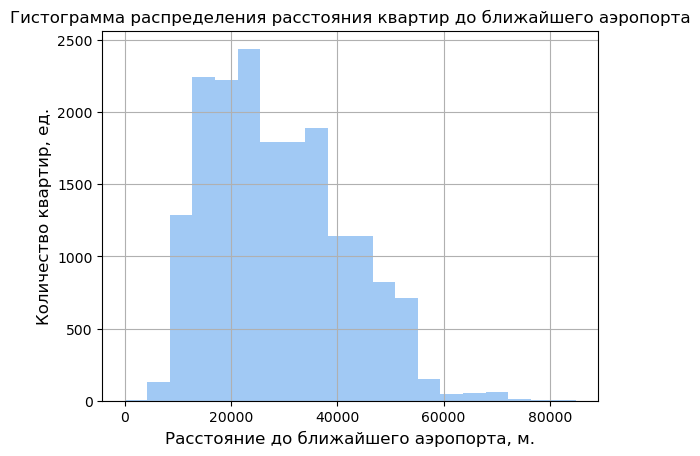

In [129]:
#построим гистограмму для столбца airports_nearest
df['airports_nearest'].plot(
    kind = 'hist',
    bins = 20,
    grid = True,    
    title = 'Гистограмма распределения расстояния квартир до ближайшего аэропорта'
)

#подпишем оси графика
plt.xlabel('Расстояние до ближайшего аэропорта, м.', fontsize=12)
plt.ylabel('Количество квартир, ед.', fontsize=12);

In [130]:
#выведем описание данных столбца airports_nearest
df['airports_nearest'].describe()

count   17942.00
mean    28807.22
std     12646.12
min         0.00
25%     18551.00
50%     26766.50
75%     37306.00
max     84869.00
Name: airports_nearest, dtype: float64

Снова попалось аномальное значение - видим из описания столбца, что минимальное расстояние до аэропорта равно нулю. Разберемся с ним, выведем сколько таких значений:

In [131]:
#выведем все строки датафрейма, в которых airports_nearest = 0
df[df['airports_nearest'] == 0]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_one_meter,weekday_expos,month_expos,year_expos,floor_type,cityCenters_nearest_km
20895,0,7000.00,34.70,2018-09-23,1,2.70,9,19.80,3,False,...,NaN,0.00,NaN,60.00,201.73,6,9,2018,другой,23.00


Такое значение только одно, заполнить нам его нечем, удалять не будем, т.к. в дальнейшем исследовании нам этот параметр (расстояние до аэропорта) не понадобится. Но будем иметь ввиду, что это точно не минимальное расстояние. Выведем топ-5 минимальных расстояний до аэропрта:

In [132]:
#выведем топ-5 минимальных расстояний до аэропорта, исключая значение airports_nearest = 0
df[df['airports_nearest'] != 0]['airports_nearest'].sort_values().head()

3982    6450.00
12783   6450.00
7708    6914.00
22939   6949.00
5018    6989.00
Name: airports_nearest, dtype: float64

Минимальное расстояние до аэропрта начинается с 6,5 км., что вполне нормально. Вернемся к гистограмме и видим, что пик расстояний до ближайшего аэропорта приходится на 25 км. В принципе основная часть квартир находится не так далеко от аэропортов, но и не так близко, в пределах от 15 до 50 км. Совсем далеко от аэропорта находится очень малое количество квартир.

12. Расстояние до ближайшего парка:

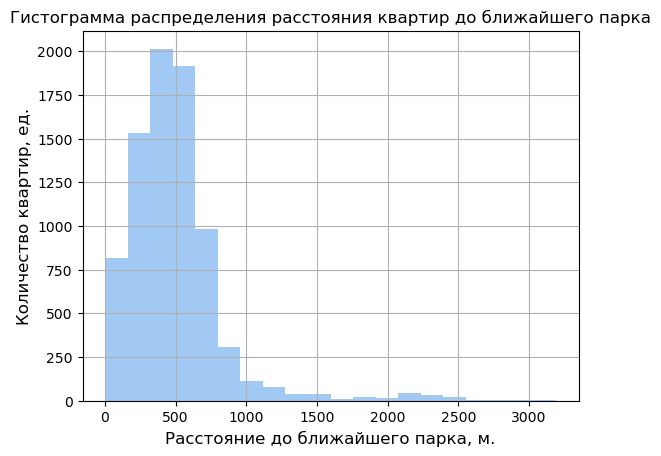

In [133]:
#построим гистограмму для столбца parks_nearest
df['parks_nearest'].plot(
    kind = 'hist',
    bins = 20,
    grid = True,    
    title = 'Гистограмма распределения расстояния квартир до ближайшего парка'
)

#подпишем оси графика
plt.xlabel('Расстояние до ближайшего парка, м.', fontsize=12)
plt.ylabel('Количество квартир, ед.', fontsize=12);

In [134]:
#выведем описание данных столбца parks_nearest
df['parks_nearest'].describe()

count   7975.00
mean     490.67
std      342.09
min        1.00
25%      288.00
50%      454.00
75%      612.00
max     3190.00
Name: parks_nearest, dtype: float64

Снова у нас есть аномальное значение - 1 м. до ближайшего парка, не думаю, что настолько близко он расположен. Посмотрим сколько таких строк в датасете:

In [135]:
#выведем все строки датафрейма, в которых parks_nearest = 1
df[df['parks_nearest'] == 1]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_one_meter,weekday_expos,month_expos,year_expos,floor_type,cityCenters_nearest_km
14491,8,3770.00,45.40,2019-03-20,2,2.60,9,28.43,2,False,...,1.00,0.00,NaN,42.00,83.04,2,3,2019,другой,16.00


Как и в случаях с аэропртами - строка с таким значением тоже только одна. Заменять его также нечем, а удалять также не будем, т.к. не хочется терять нормальные данные по всем остальным параметрам, да и в дальнейшем исследовании мы этот параметр (расстояние до ближайшего парка) использовать не будем.

Выведем топ 5 минимальных расстояний до парка:

In [136]:
#выведем топ-5 минимальных расстояний до парка, исключая значение parks_nearest = 1
df[df['parks_nearest'] != 1]['parks_nearest'].sort_values().head()

11842   3.00
22731   4.00
9265    7.00
2508    9.00
20011   9.00
Name: parks_nearest, dtype: float64

Так, видим, что очень маленьких расстояний довольно много, ну хоть не 1 метр, ведь действительно, многи дома расположен непосредственно вблизи парков. Оставим все как есть.

Смотрим на гистограмму: больше всего квартир с расстоянием до парков около 500 м. Причем само распредление значений - нормальное: нет слишком большого числа квартир (читай "домов") рядом с парками и нет слишком большого - вддали от парков.

13. День и месяц публикации объявления:

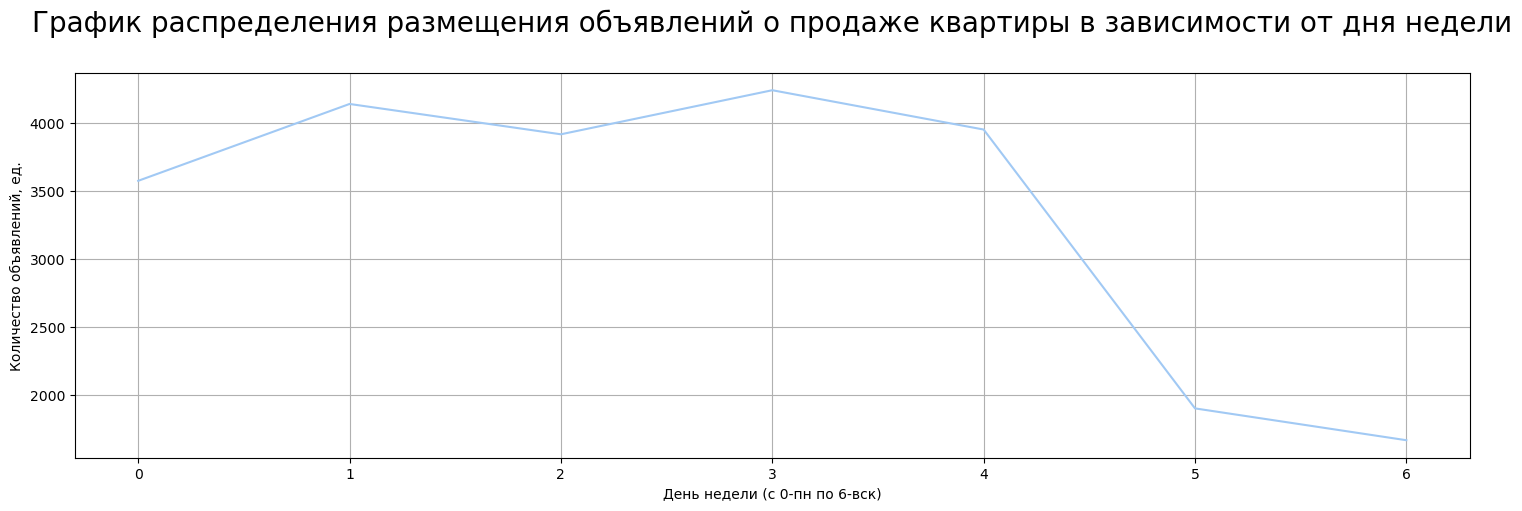

In [137]:
#зададим размер графика
plt.figure(figsize=(18,5))

#построим линейный график для столбца weekday_expos
sns.lineplot(
    data=df.groupby( #сгруппируем датасет по дням недели ('weekday_expos')
        'weekday_expos', as_index=False
    ).agg(count=('rooms', 'count')), #посчитаем какое количество квартир приходится для каждого типа
    x='weekday_expos', #по оси х отложим день недели
    y='count' #по оси у - количество квартир для каждого дня
)

#зададим сетку
plt.grid() 

#формируем заголовок графика и подписи осей средствами matplotlib
plt.title('График распределения размещения объявлений о продаже квартиры в зависимости от дня недели\n', fontsize=20)
plt.xlabel('День недели (с 0-пн по 6-вск)', fontsize=10)
plt.ylabel('Количество объявлений, ед.', fontsize=10);

Чаще всего объявления о продаже квартир размещаются по будням, в выходные в разы меньше.

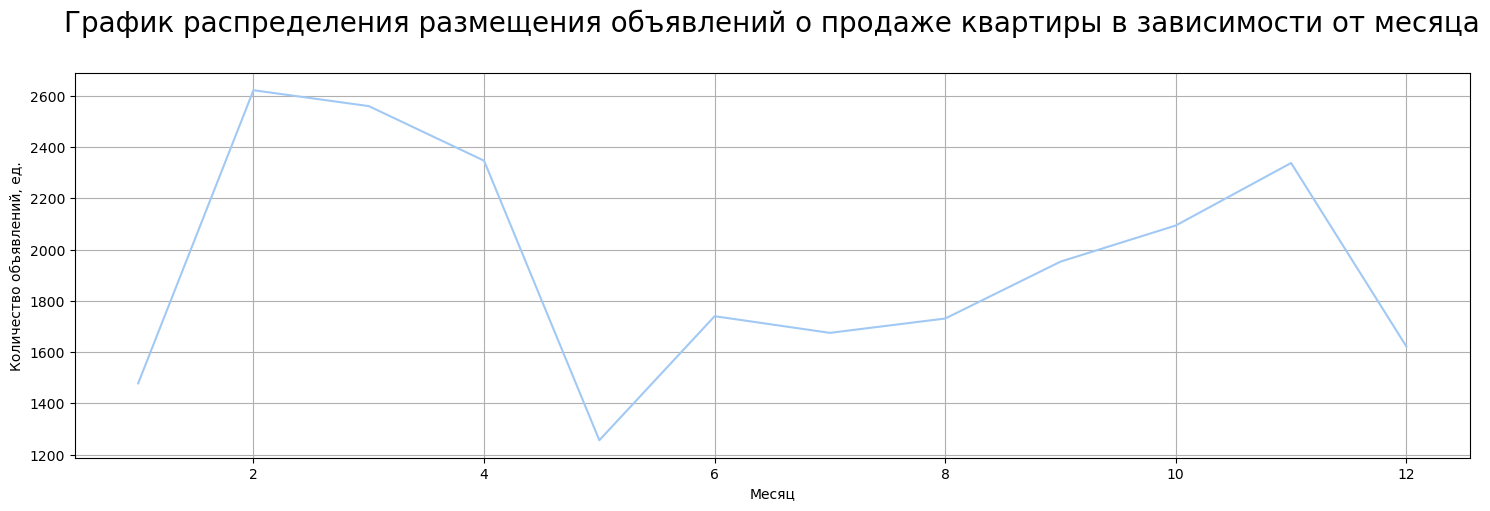

In [138]:
#зададим размер графика
plt.figure(figsize=(18,5))

#построим линейный график для столбца weekday_expos
sns.lineplot(
    data=df.groupby( #сгруппируем датасет по месяцам ('month_expos')
        'month_expos', as_index=False
    ).agg(count=('rooms', 'count')), #посчитаем какое количество квартир приходится для каждого типа
    x='month_expos', #по оси х отложим наименования месяца публикации
    y='count' #по оси у - количество квартир для каждого месяца
)

#зададим сетку
plt.grid() 

#формируем заголовок графика и подписи осей средствами matplotlib
plt.title('График распределения размещения объявлений о продаже квартиры в зависимости от месяца\n', fontsize=20)
plt.xlabel('Месяц', fontsize=10)
plt.ylabel('Количество объявлений, ед.', fontsize=10);

Активно размещаются объявления о продаже квартир в феврале месяце, далее с каждым месяцем до конца мая размещение объявлений идет на спад. В мае меньше всего размещают (возможно все занмаются садоводством - огороды), затем летом наблюдается небольшой рост количества объявлений и так по нарастающей до ноября. При этом в декабре и январе спад размещения объявлений - значительный (все готовятся к праздникам и отдыхают).

**Изучим, как быстро продавались квартиры (столбец days_exposition).**

Этот параметр показывает, сколько дней «висело» каждое объявление. Для этого построим гистограмму и выведем описание столбца:

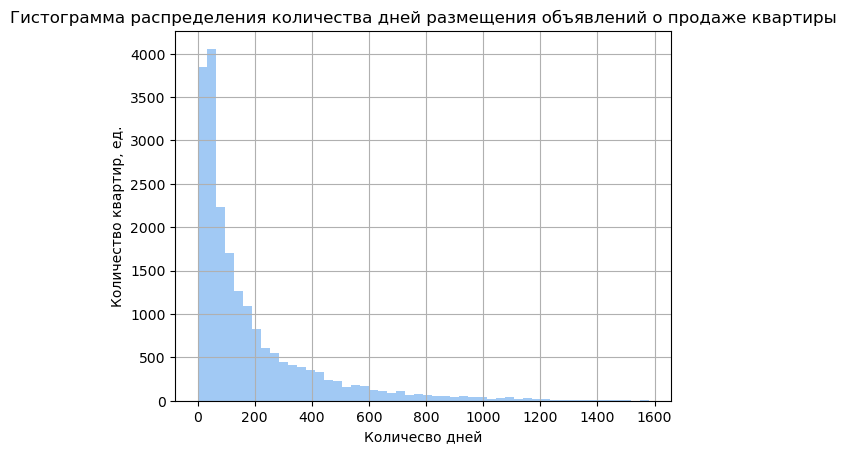

In [139]:
#построим гистограмму для столбца days_exposition
df['days_exposition'].plot(
    kind = 'hist',
    bins = 50,
    grid = True,    
    title = 'Гистограмма распределения количества дней размещения объявлений о продаже квартиры'
)

#формируем подписи осей
plt.xlabel('Количесво дней', fontsize=10)
plt.ylabel('Количество квартир, ед.', fontsize=10);

Гистограмма похожа на распределение Пуассона. Причем, выглядит так, как будто очень много объявлений висело 0 дней. Проверим это. Сперва выведем описание столбца:

In [140]:
#выведем описание данных столбца days_exposition
df['days_exposition'].describe()

count   20259.00
mean      180.82
std       219.57
min         1.00
25%        45.00
50%        95.00
75%       231.00
max      1580.00
Name: days_exposition, dtype: float64

Конечно, не ноль, но и 1 тоже слишком мало. 

Сразу отметим, что средняя продолжительность продажи квартир равна полгода, а медианное - около 3 мес. Еще интерсное максимальное значение - какая-то квартира продавалась около 4 лет? Или ее просто забыли снять с продажи?

Посмотрим сколько таких строк в датасете с общим количеством днем размещения объявления равным 1:

In [141]:
#выведем все строки датафрейма, в которых days_exposition = 1
df[df['days_exposition'] == 1]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_one_meter,weekday_expos,month_expos,year_expos,floor_type,cityCenters_nearest_km
1617,19,4000.00,49.90,2019-05-01,2,2.50,9,25.00,1,False,...,20.00,1.00,681.00,1.00,80.16,2,5,2019,первый,14.00


Это буквально одна строка, скорее всего, это аномальное значение. Человек мог разместить и передумать.

Приблизим гистограмму, чтобы разглядеть поближе сколько дней составляют пик:

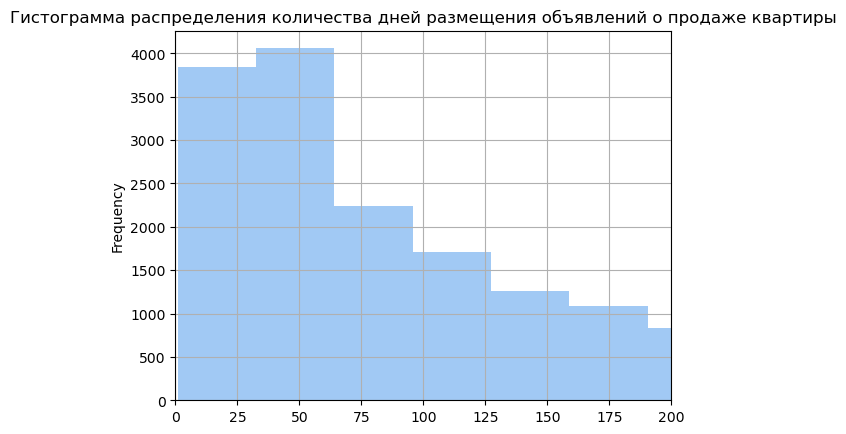

In [142]:
#построим масштабированную гистограмму для столбца days_exposition, применив  xlim = (0, 200)
df['days_exposition'].plot(
    kind = 'hist',
    bins = 50,
    grid = True,    
    title = 'Гистограмма распределения количества дней размещения объявлений о продаже квартиры',
    xlabel = 'Количесво дней',
    ylabel = 'Количество квартир, ед.',
    xlim = (0, 200)
);

Выведем еще топ-10 минимальное количество дней, за которое были проданы квартиры:

In [143]:
#выведем топ-10 минимальное количество дней, за которое были проданы квартиры
df['days_exposition'].value_counts().head(10)

45.00    865
60.00    538
7.00     231
30.00    207
90.00    199
4.00     172
3.00     155
5.00     149
14.00    144
9.00     141
Name: days_exposition, dtype: int64

Видно, что больше всего квартир продавалось за 1,5 и 2 месяца. Часто в топе (да и на гистограмме видно) попадаются занчения с количеством дней размещения объявления равным 3, 4, 5 , 7 , 9, 14 дней. Предположение, что собственники этих квартир разместили объявления, а затем передумали по каким-либо причинам продавать их и закрыли объявления. Конечно, можно допустить, что это была просто очень быстрая продажа, но вероятность очень мала, основываясь на общем опыте.

Выведем еще список 10 самых длинных продаж (на это натолкнуло занчения максимального количества дней продажи квартиры, которое составляет больше 4 лет):

In [144]:
#выведем топ-10 максимальное количество дней, за которое были проданы квартиры
df['days_exposition'].sort_values(ascending = False).head(10)

18676   1580.00
1098    1572.00
9473    1553.00
1869    1513.00
6632    1512.00
20779   1512.00
13968   1497.00
15176   1489.00
18952   1485.00
11848   1484.00
Name: days_exposition, dtype: float64

Оказывается случай с максимальным значением - не единичный. Может и правда продают, просто она не продается, например по причине высокой цены и они ее снижать не хотят и при этом с продажей не торопятся, а может быть это квартиры, которые соврешенно непривликательны ни расположением, ни внутренней обстановкой, ну и третий вариант, как мы уже описали выше - объявление могли просто забыть снять с размещения.

**Вывод:** Большая часть квартир продается за 3 мес. (медианное значение). Бытсрыми продажами можно считать квартиры проданные до 1,5 месяца (1 квартиль диаграммы размаха из описания столбца - 45 дней). Долгими продажами можно считать квартиры, которые продаются около 8 мес. И есть квартиры, которые продаются годами, предположительные причины таких долгих продаж: квартира не котируется, завышена цена, забыли снять объявление с продажи.

**Рассмотрим какие факторы больше всего влияют на общую (полную) стоимость объекта.**

Будем рассматривать влияние таких факторов как:
* общая площадь;
* жилая площадь;
* площадь кухни;
* количество комнат;
* типа этажа, на котором расположена квартира (первый, последний, другой);
* дата размещения (день недели, месяц, год).

Построим диаграммы рассеяния для каждого из вышеперчисленных параметров:

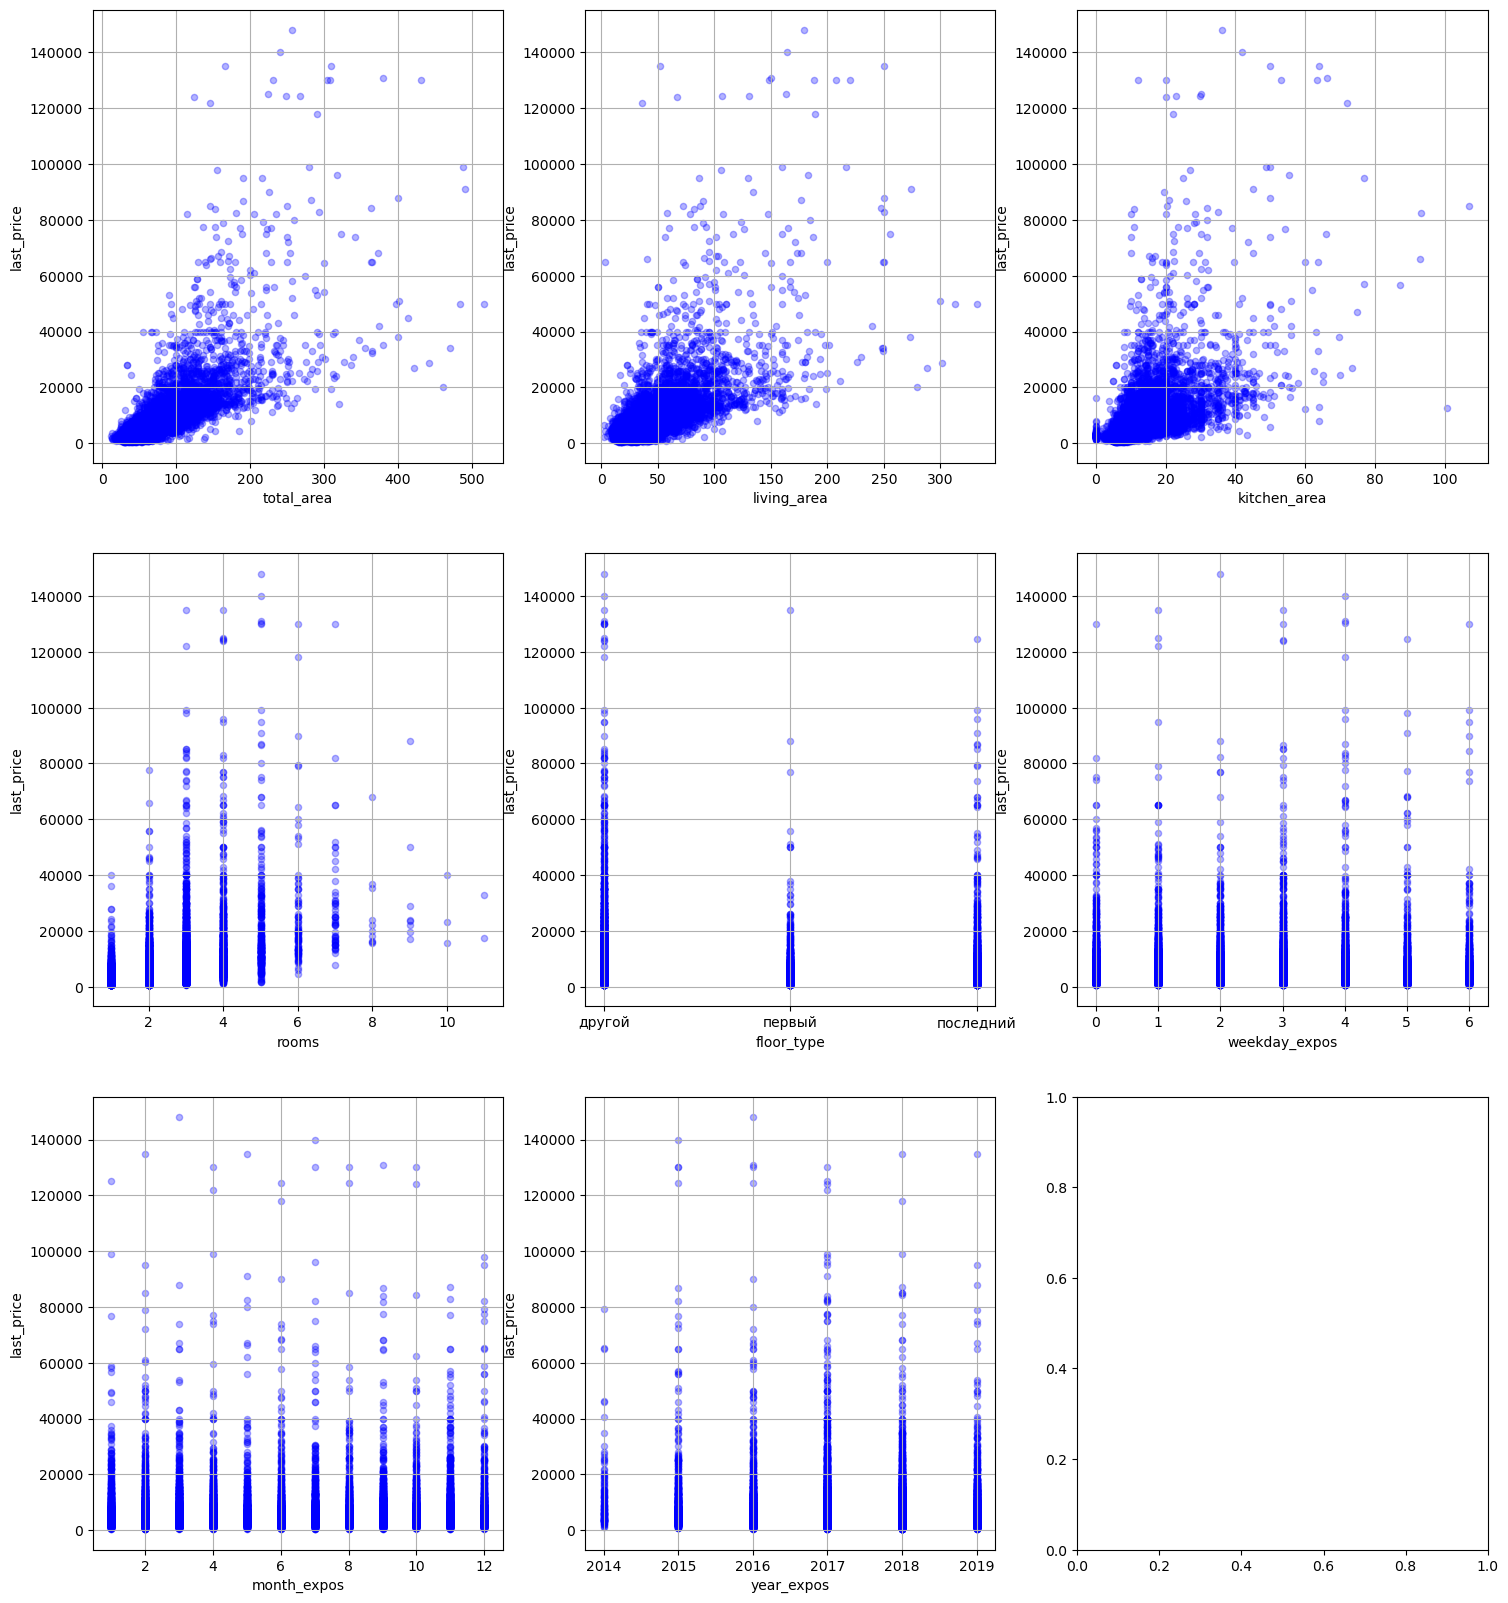

In [145]:
#построим диаграммы рассеяния по перечисленным выше параметрам

#обозначим количество строк (rows) и столбцов (cols)
rows = 3
cols = 3

#задаем цветовую палитру
sns.set_palette('pastel')
#зададим параметры, что хотим увидеть матрицу диаграмм 3 на 3
fig, axes = plt.subplots(3, 3)
axes = axes.ravel()

#зададим цикл, чтобы диаграммы строились по всем заданными нами колонкам
i = 0
 
for col in ['total_area','living_area','kitchen_area','rooms','floor_type', 'weekday_expos','month_expos','year_expos']:
    ax = df.plot(x=col, y='last_price', kind='scatter', ax = axes[i], figsize=(18, 20), grid=True, alpha = 0.3, c='blue')
    i+=1;

Выведем еще коэффициенты корреляции Пирсона цены со всеми перечисленными параметрами кроме типа этажей, т.к. это категориальная переменная:

In [146]:
#применим метод подсчета коэф-та корреляции для всех параметров, включая цену, и выведем только первую строку, чтобы
#посмотреть только взаимосвязь с ценой
df[
    ['last_price',
    'total_area',
    'living_area',
    'kitchen_area',
    'rooms',
    'weekday_expos',
    'month_expos',
    'year_expos']
  ].corr().head(1)

,last_price,total_area,living_area,kitchen_area,rooms,weekday_expos,month_expos,year_expos
last_price,1.00,0.74,0.66,0.59,0.45,-0.00,0.01,-0.06


Из представленных диаграмм рассения можно сделать следующие выводы:
* диаграммы рассеяния в зависимости от вида рассматриваемой площади (общая, жилая или площадь кухи) очень схожи и говорят об одном - чем больше площадь - тем выше стоимость квартиры, т.е. корреляция положителная.
Также это подверждается коэффициентами корреляции Пирсона равными относительно:
 - общей площади - 0,74 - довольно близок к единице, это хорошо!
 - жилой площади - 0,66 - он уже ниже, чем от общей площади, т.е. и взаимосвязь с данным параметром меньше;
 - площади кухни - 0,59 - еще меньше;
из чего можно сделать вывод, что при покупке квартир или при продаже покупатель/продавец соотносит цену в первую очередь с общей площадью, а взаимосвязь со всеми остальными видами площадей уже вытекающая и не так важна, т.к. всегда можно сделать перепаланировку;
* тоже самое с количеством комнат, чем больше комнат в квартире, тем выше стоимость. Выше всего стоимость у трехкомнатных квартир (соответственно у них и площадь большая), у 4-хкомнатных и больше - стоимость, конечно, выше, но они не так часто встречаются, поэтому сложно увидеть плотную корреляцию.
При этом коэффициент корреляции равен 0,45, что свидетельствует о том, что параметры, конечно, взаимосвязаны, но само количество комнат не так сильно влияет на цену в отличие общей площади;
* видим, что квартиры на последнем этаже стоят дороже - это так называемые "видовые" квартиры, скоре всего, по этой причине цена на них в разы выше, чем у квартир, расположенных на 1-м этаже. При этом квартиры из категории этажа "другой" все же больше влияют на стоимость, возможно, по причине того, что в эту категорию попало намного больше значений и вполне возможно, что на высокий рост цены повлияли квартиры также на выскоих этажах, но не являющимися последними;
* из дней недели можно сделать вывод, что они особо не влияют на стоимость квартиры, явных различий меж ними нет. Это подтверждается и коэффициентом корреляции, который равен нулю;
* среди месяцев можно отметить, что цены выше в феврале, июне и ноябре. Пик в феврале может быть вызван тем, что многие в новом году берутся за покупку квартиры, в т.ч. берут ипотеки, соответственно спрос растет, и, как известно, цена тоже. В ноябре почти такая же ситуация, только наоборот - конец года и все хотят побыстрее завершить дела, которые запланировали, + прибавляется спрос тех покупателей, которые, может и не планировали в этом году завершать сделку, но при этом за их счет цена также "набивается". В середине года (в июне) сложно предположить почему такой рост цен, но, возможно это ввиду того, что сделки длятся в среднем 3-6 месяцев,если принимаем во внимание, что покупатель запланировал сделку в первых месяца нового года. При этом можно отметить, что в целом взаимосвязь месяца и купли-продажи квартиры не так сильно коррелируют, скорее, мы увидили просто общую тенденцию, что в определенные месяца продаж больше. Сам коэффициент, можно сказать, тут равен нулю;
* на диаграмме с годами заметен рост цен в 2017 году: предположительно по причине того, что после санкций 2014 года прошло пару лет и не было дополнительных новых кризисных вводных, т.о. рынок начал восстанавливаться, соответственно и люди стали больше думать о возможности покупке квартиры. С коэффициентом тут схожая история, он просто почти равен нулю, что только подтверждает наши доводы.

Построим еще график изменения медианной стоимости квартир в зависисмости от года:

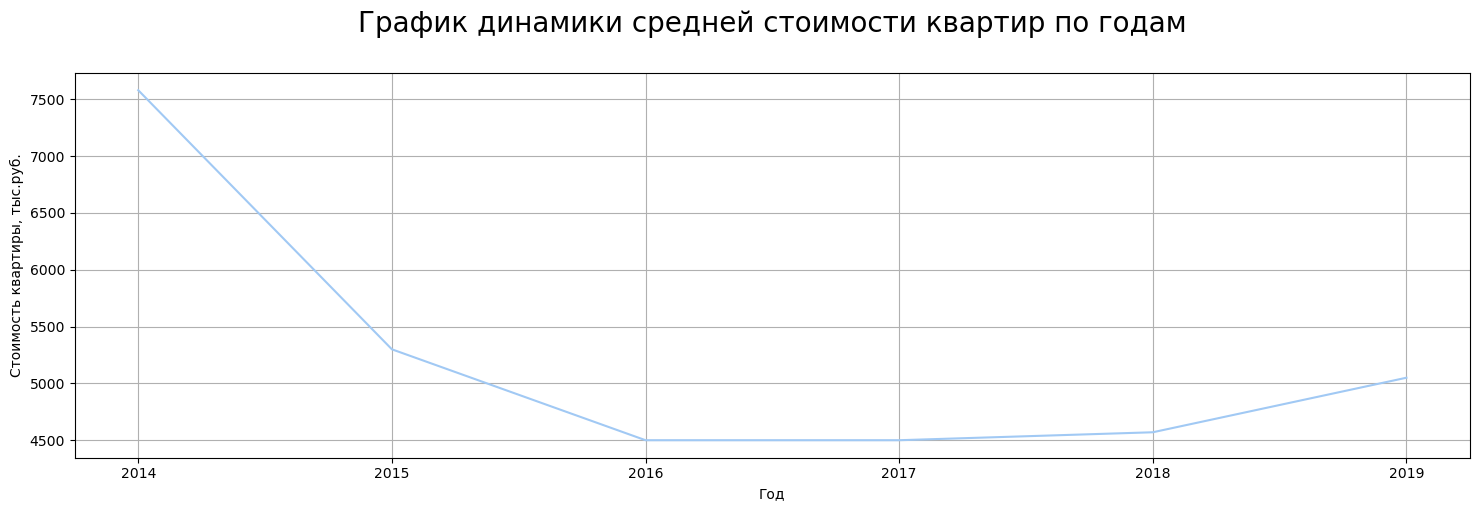

In [147]:
#зададим размер графика
plt.figure(figsize=(18,5))

#построим линейный график для столбца weekday_expos
sns.lineplot(
    data=df.groupby( #сгруппируем датасет по годам ('year_expos')
        'year_expos', as_index=False
    ).agg(median_price=('last_price', 'median')), #посчитаем медианную стоимость квартир для каждого года
    x='year_expos', #по оси х отложим года
    y='median_price' #по оси у - среднюю стоимость квартиры
)

#зададим сетку
plt.grid() 

#задаем цветовую палитру
sns.set_palette('pastel')

#формируем заголовок графика и подписи осей средствами matplotlib
plt.title('График динамики средней стоимости квартир по годам\n', fontsize=20)
plt.xlabel('Год', fontsize=10)
plt.ylabel('Стоимость квартиры, тыс.руб.', fontsize=10);

На графике четко видно как происходящие в мире и, в частности, в России за эти годы события влияли на **среднерыночную (смотрим медиану)** стоимость квартир.

**Вывод:**

Исходя из вышесказанного, больше всего среди рассматриваемых параметров на стоимость квартиры влияет его общая площадь.

Также прослеживается взаимосвязь стоимости и этажа квартиры: высокие цены можно увидеть в квартирах с типом этажей "другой" (предположение, что может быть по причине увеличения стоимости при увеличения этажа, на котором расположена квартира), а также на последнем этаже. Цены на квартиры, расположенные на первых этажах ниже. 

Судя по всему, эти 2 фактора больше всего влияют на стоимость квартиры.

По году мы можем просто отследить обстановку в мире, которая сказывается на абсолютной стоимости квартир, при этом, скорее всего, если бы мы смотрели анализ в пределах какого-либо года, то факторы площади и этажности квартир по-прежнему играли бы решающую роль.
    
Месяц и день недели в рамках данного анализа данных на цену не влияет. 
</div>

**Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений:**

In [148]:
#создадим сводную таблицу по наименованиям насленных пунктов со следующими параметрами:
#количество размещенных объявлений, общая стоимость всех квартир в данном н.п., общая площадь всех квартир в данном н.п.
df_price_m2 = df.pivot_table(
    index = 'locality_name',
    values = ['first_day_exposition', 'last_price', 'total_area'],
    aggfunc = {'first_day_exposition': 'count', 'last_price': 'median', 'total_area': 'median'})

#создадим в сводной таблице столбик, в котором будет посчитана цена 1 кв.м. в каждом н.п.
df_price_m2['pice_m2'] = df_price_m2['last_price'] / df_price_m2['total_area']

#выведем топ-10 населенных пунктов по количеству размещенных объявлений
df_price_m2.sort_values(by = 'first_day_exposition', ascending = False).head(10)

,first_day_exposition,last_price,total_area,pice_m2
locality_name,,,,
Санкт-Петербург,15554,5500.00,55.00,100.00
Мурино,579,3400.00,38.00,89.47
Кудрово,457,3900.00,40.00,97.50
Шушары,439,3950.00,50.20,78.69
Всеволожск,397,3450.00,53.50,64.49
Пушкин,369,5180.00,53.20,97.37
Колпино,338,3600.00,50.00,72.00
Парголово,324,4135.00,43.00,96.16
Гатчина,307,3100.00,45.00,68.89


Больше всего объявлений в г. Санкт - Петербург, причем их очень много - 15,5 тыс. шт., относительно других н.п., где самое больше кол-во объявлений в Мурино - 579 объявлений и так по уменьшению (довольно равномерному) до 234 шт. объявлений в Выборге.

Причем цена за 1 кв.м., конечно, выше всего в Санкт-Петербурге (по крайней мере в этом топе) - 100 тыс. руб./м2, в остальных н.п. она колеблется от 57 до 97 тыс. руб./м2.

Интересно еще соотнести эти топ-10 н.п. со средним расстоянием до центра Санкт_петерьурга, сформируем такие данные:

In [149]:
#перезапишем нашу сводную таблицу df_price_m2, добавив в нее еще параметры столбца cityCenters_nearest
df_price_m2 = df.pivot_table(
    index = 'locality_name',
    values = ['first_day_exposition', 'last_price', 'total_area', 'cityCenters_nearest'],
    aggfunc = {'first_day_exposition': 'count', 'last_price': 'median', 'total_area': 'median', 'cityCenters_nearest': 'median'})

#снова создадим в сводной таблице столбик, в котором будет посчитана цена 1 кв.м. в каждом н.п.
df_price_m2['pice_m2'] = df_price_m2['last_price'] / df_price_m2['total_area']

#и еще раз выведем топ-10 населенных пунктов по количеству размещенных объявлений, только теперь мы еще увидим среднее
#расстояние до центра города Санкт-Петербург
df_price_m2.sort_values(by = 'first_day_exposition', ascending = False).head(10)

,cityCenters_nearest,first_day_exposition,last_price,total_area,pice_m2
locality_name,,,,,
Санкт-Петербург,12252.00,15554,5500.00,55.00,100.00
Мурино,NaN,579,3400.00,38.00,89.47
Кудрово,NaN,457,3900.00,40.00,97.50
Шушары,24212.00,439,3950.00,50.20,78.69
Всеволожск,NaN,397,3450.00,53.50,64.49
Пушкин,27930.50,369,5180.00,53.20,97.37
Колпино,32018.00,338,3600.00,50.00,72.00
Парголово,19325.00,324,4135.00,43.00,96.16
Гатчина,NaN,307,3100.00,45.00,68.89


Достаточно много пропущенных данных и в принципе полученная вновь информация нам особо ничего не дала: нельзя сказать, что напрямую прослеживается зависимость, чем больше расстояние от центра, тем меньше кол-во объявлений, в т.ч. тому могла послужить нехватка данных.

Посмотрим в каком н.п. самая высокая стоимость 1-го кв.м.:

In [150]:
#выведем строку сводной таблицы с максимальной стоимостью 1-го кв.м.
print('Параметры населенного пункта с наибольшей стоимость 1 кв.м.:')
df_price_m2.sort_values(by = 'pice_m2', ascending = False).head(1)

Параметры населенного пункта с наибольшей стоимость 1 кв.м.:


,cityCenters_nearest,first_day_exposition,last_price,total_area,pice_m2
locality_name,,,,,
Зеленогорск,53381.00,24,4750.00,46.30,102.59


На удивление лидером по стоимости 1 кв.м. является Зеленогорск... может быть, там там много хорошей зеленой парковой зоны и вообще это что-то вроде местной рублевки. Причем, что примечательно, этот н.п. довольно далеко расположен от центра и у него всего 24 объявления за все 4 года. Мне кажется, что в случае с этим н.п. не самая репрезентативная выборка и результаты могут быть недоконца корректными, поэтому посмотрим, кто на "втором" (читай "первом") месте:

In [151]:
#выведем строку сводной таблицы с максимальной стоимостью 1-го кв.м.
print('Параметры населенного пункта с наибольшей стоимость 1 кв.м.:')
df_price_m2.sort_values(by = 'pice_m2', ascending = False).head(2)

Параметры населенного пункта с наибольшей стоимость 1 кв.м.:


,cityCenters_nearest,first_day_exposition,last_price,total_area,pice_m2
locality_name,,,,,
Зеленогорск,53381.00,24,4750.00,46.30,102.59
Санкт-Петербург,12252.00,15554,5500.00,55.00,100.00


In [152]:
#выведем строку сводной таблицы с наименьшей стоимостью 1-го кв.м.
print('Параметры населенного пункта с наименьшей стоимость 1 кв.м.:')
df_price_m2.sort_values(by = 'pice_m2').head(1)

Параметры населенного пункта с наименьшей стоимость 1 кв.м.:


,cityCenters_nearest,first_day_exposition,last_price,total_area,pice_m2
locality_name,,,,,
Старополье,NaN,3,450.00,40.00,11.25


Значительная разница в стоимости, да и объявлений там всего - 3. Конечно, тоже не самая репрезентативная выборка, но будем знать.

**Вывод:** больше всего объявлений сосредоточено в Санкт-Петербурге, что вполне ожидаемо, т.к. это мегаполис и жизнь там "кипит". В нашем срезе данных кол-во объявлений за все эти годы составило 15,5 тыс. шт.

Дальше резко идет уменьшение кол-ва объявлений, почти в 27 раз, и варьируется наибольшее среди всех остальных н.п. от 500 до 200 шт..

Максимальная стоимость 1 м2 в г. также в г. Санкт-Петербург и она составляет в среднем около 100 тыс. руб./м2, минимальная стоимость в н.п. Старополье и равна она - 11 тыс. руб./м2.

**Выделим квартиры, расположенные в Санкт-Петербурге, и вычислим среднюю цену каждого километра до центра города:**

In [153]:
#посчитаем среднюю стоимость одного километра до центра города в пределах Санкт-Петербурга
(
    df[df['locality_name'] == 'Санкт-Петербург']['last_price'].sum()
    / df[df['locality_name'] == 'Санкт-Петербург']['cityCenters_nearest_km'].sum()
).round(2)

666.47

Чем ближе к центру, тем сильно дороже - с каждым км. к стоимости можно прибавлять по 666 тыс. руб.

Выведем на графике как влияет расстояние от центра на стоимость квартиры:

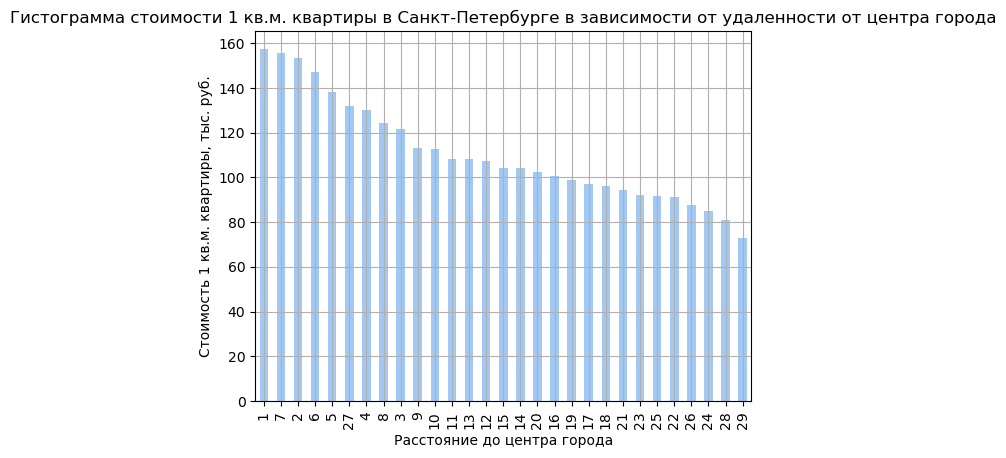

In [154]:
#сперва заполним все пропуски в столбце cityCenters_nearest_km основного датасета и приведем их к целочисленному типу int
df['cityCenters_nearest_km'] = df['cityCenters_nearest_km'].fillna(0).astype('int')

#создадим новую переменную, в которую поместим объекты, расположенные только в Санкт-Петербурге и отобразим в ней столбцы
#стоимость квартиры, общую площадь и расстояние до центра, в котором исключены нулевые значения, т.к. это пропуски
df_spb_flat = df.loc[(df['locality_name'] == 'Санкт-Петербург')
                     & (df['cityCenters_nearest_km'] != 0),
                     ['last_price', 'total_area', 'cityCenters_nearest_km']]

#добавим в новый датасет колонку со стоимостью одного 1 кв.м.
df_spb_flat['price_m2'] = df_spb_flat['last_price'] / df_spb_flat['total_area']

#построим столбчатый график соотношения стоимости 1 кв.м. квартиры и расстояния от центра города 
df_spb_flat.groupby('cityCenters_nearest_km')['price_m2'].mean().sort_values(ascending = False).plot(
    kind = 'bar',
    grid = True,    
    title = 'Гистограмма стоимости 1 кв.м. квартиры в Санкт-Петербурге в зависимости от удаленности от центра города',
    xlabel = 'Расстояние до центра города',
    ylabel = 'Стоимость 1 кв.м. квартиры, тыс. руб.',
    y = 'price_m2',
    x = 'cityCenters_nearest_km'
);

Общая динамика зависимости стоимости 1 кв.м. объекта недвижимости от удаленности от центра города выглядит так: чем дальше от центра города, тем ниже стоимость 1 кв.м.

Значительно выбивается из этой динамики 27 км. - возможно, там надо посмотреть подробнее, что там за квартиры, т.к. они довольно далеко расположены от центра, а по стоимости как те, что в районе 5-4 км. от центра.

**Вывод:** в пределах Санкт-Петербурга с приближением объекта недвижимости на каждый километр к центру города стоимость увеличивается на 666 тыс. руб.

Стоимость 1 кв.м. объекта недвижимости, расположенного в Санкт-Петербурге тем выше, чем ближе к центру города.

### Общий вывод
<a id="conclusion"></a> 

**В этоим исследовании мы:**
- рассмотрели данные в первоначальном виде и выявили какие данные стоит преобразовать, обратить на них внимание;
- сделали предобработку данных (заполнили пропуски, убрали явные выбросы) - это необходимо для работы с корректной "картиной" рынка;
- для дальнейшего анализа сделали по каждому объекту расчеты стоимости 1 кв.м., выделили дни публикации (отдельно на год, месяц и день недели), разделили этажи на 3 категории (первый, последний и другие);
- провели анализ данных в целом по Ленинградской области и отдельно для Санкт-Петербурга;
- проанализировали отличаются ли факторы, которые влияют на ценообразование квартир и какой из них влияет сильнее.

1. Самый очевидный и в то же время ожидаемый вывод - чем ближе квартира расположена к центру, тем выше ее стоимость.
2. Из того же разряда: чем больше площадь квартиры, тем выше ее стоимость.
3. Из инетересных: в разные месяцы разный спрос на квартиры, так в ферале, июне и ноябре цены на квартиры выше, чем в другие месяцы.
4. От дня недели стоимость квартиры вообще не зависит, а параметр года отражает общую обстановку происходящего на рынке на разных этапах экономики страны.
5. На стоимость влияет этажность: квартиры на первом этаже меньше по стоимости, чем на последнем, и возможно, чем просто на высоких этажах (для других этажей нужно проводить доп. исследование).
6. В основном квартиры продаются за 3 мес. Быстрыми продажами можно считать квартиры, проданные за 1 - 1,5 мес. Долгими - полгода и больше.
